# Analysis PICASSSO - Paper Plots

This notebook contains part of the analysis for Buck&Wolf (2020) 
in particular all plots which do not need to access the galaxy data directly can be reproduced by this notebook.

In [1]:
# package import
import picasso as p
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

from picasso.analysis import util
from picasso.plot import statistics

Picasso's configurations:
{'verbose': False, 'families': {'training': 'train, t, tr', 'testing': 'test', 'validation': 'val, v, valid'}, 'survey-class-priority': [<class 'picasso.survey.illustris.SDSSMockSurvey'>], 'scale_to_physical': True}


In [2]:
#plot styles
#import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)

#sns.set_style('ticks')
#sns.set_style('darkgrid')
#sns.set_context("talk",font_scale=2,rc={"lines.linewidth": 4,"axes.linewidth": 5})

plt.rc('axes', linewidth=3)
plt.rcParams['axes.labelsize'] = 35 #'large'
plt.rcParams['xtick.labelsize'] = 35 #'large'
plt.rcParams['xtick.major.pad'] = 12
plt.rcParams['ytick.labelsize'] = 35 #'large'
plt.rcParams['ytick.major.pad'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
#plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'#'gray'
#plt.rcParams['axes.grid'] = True
#plt.rcParams['grid.color'] = 'lightgray'
#plt.rcParams['grid.linestyle'] = 'dashed' #dashes=(5, 1)
#plt.rcParams['lines.dashed_pattern'] = 10, 3
#plt.rcParams['grid.linewidth'] = 1.5
#plt.rcParams['axes.facecolor'] = 'whitesmoke'
#plt.rcParams['axes.axisbelow'] = True
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.shadow'] = False
plt.rcParams['legend.edgecolor'] = 'lightgray'
plt.rcParams['patch.linewidth'] = 3

In [3]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Histograms

In [5]:
# load pre-calculated data
true, pred, dm, masked = util._get_predicted_vs_true('./data/predicted_vs_true_ugriz_0_1500.h5')

True keys:
['gas_GFM_Metallicity', 'gas_GFM_Metallicity_all', 'gas_GFM_Metallicity_grad', 'gas_GFM_Metallicity_rad', 'gas_GFM_Metallicity_rad_npix', 'gas_Masses', 'gas_Masses_all', 'gas_Masses_grad', 'gas_Masses_rad', 'gas_Masses_rad_npix', 'gas_NeutralHydrogenAbundance', 'gas_NeutralHydrogenAbundance_all', 'gas_NeutralHydrogenAbundance_grad', 'gas_NeutralHydrogenAbundance_rad', 'gas_NeutralHydrogenAbundance_rad_npix', 'gas_StarFormationRate', 'gas_StarFormationRate_all', 'gas_StarFormationRate_grad', 'gas_StarFormationRate_rad', 'gas_StarFormationRate_rad_npix', 'stars_GFM_Metallicity', 'stars_GFM_Metallicity_all', 'stars_GFM_Metallicity_grad', 'stars_GFM_Metallicity_rad', 'stars_GFM_Metallicity_rad_npix', 'stars_GFM_StellarFormationTime', 'stars_GFM_StellarFormationTime_all', 'stars_GFM_StellarFormationTime_grad', 'stars_GFM_StellarFormationTime_rad', 'stars_GFM_StellarFormationTime_rad_npix', 'stars_Masses', 'stars_Masses_all', 'stars_Masses_grad', 'stars_Masses_rad', 'stars_Masses_

In [6]:
true.keys()

dict_keys(['gas_GFM_Metallicity', 'gas_GFM_Metallicity_all', 'gas_GFM_Metallicity_grad', 'gas_GFM_Metallicity_rad', 'gas_GFM_Metallicity_rad_npix', 'gas_Masses', 'gas_Masses_all', 'gas_Masses_grad', 'gas_Masses_rad', 'gas_Masses_rad_npix', 'gas_NeutralHydrogenAbundance', 'gas_NeutralHydrogenAbundance_all', 'gas_NeutralHydrogenAbundance_grad', 'gas_NeutralHydrogenAbundance_rad', 'gas_NeutralHydrogenAbundance_rad_npix', 'gas_StarFormationRate', 'gas_StarFormationRate_all', 'gas_StarFormationRate_grad', 'gas_StarFormationRate_rad', 'gas_StarFormationRate_rad_npix', 'stars_GFM_Metallicity', 'stars_GFM_Metallicity_all', 'stars_GFM_Metallicity_grad', 'stars_GFM_Metallicity_rad', 'stars_GFM_Metallicity_rad_npix', 'stars_GFM_StellarFormationTime', 'stars_GFM_StellarFormationTime_all', 'stars_GFM_StellarFormationTime_grad', 'stars_GFM_StellarFormationTime_rad', 'stars_GFM_StellarFormationTime_rad_npix', 'stars_Masses', 'stars_Masses_all', 'stars_Masses_grad', 'stars_Masses_rad', 'stars_Masses_r

In [7]:
len(true.keys())

35

In [8]:
len(pred.keys())

35

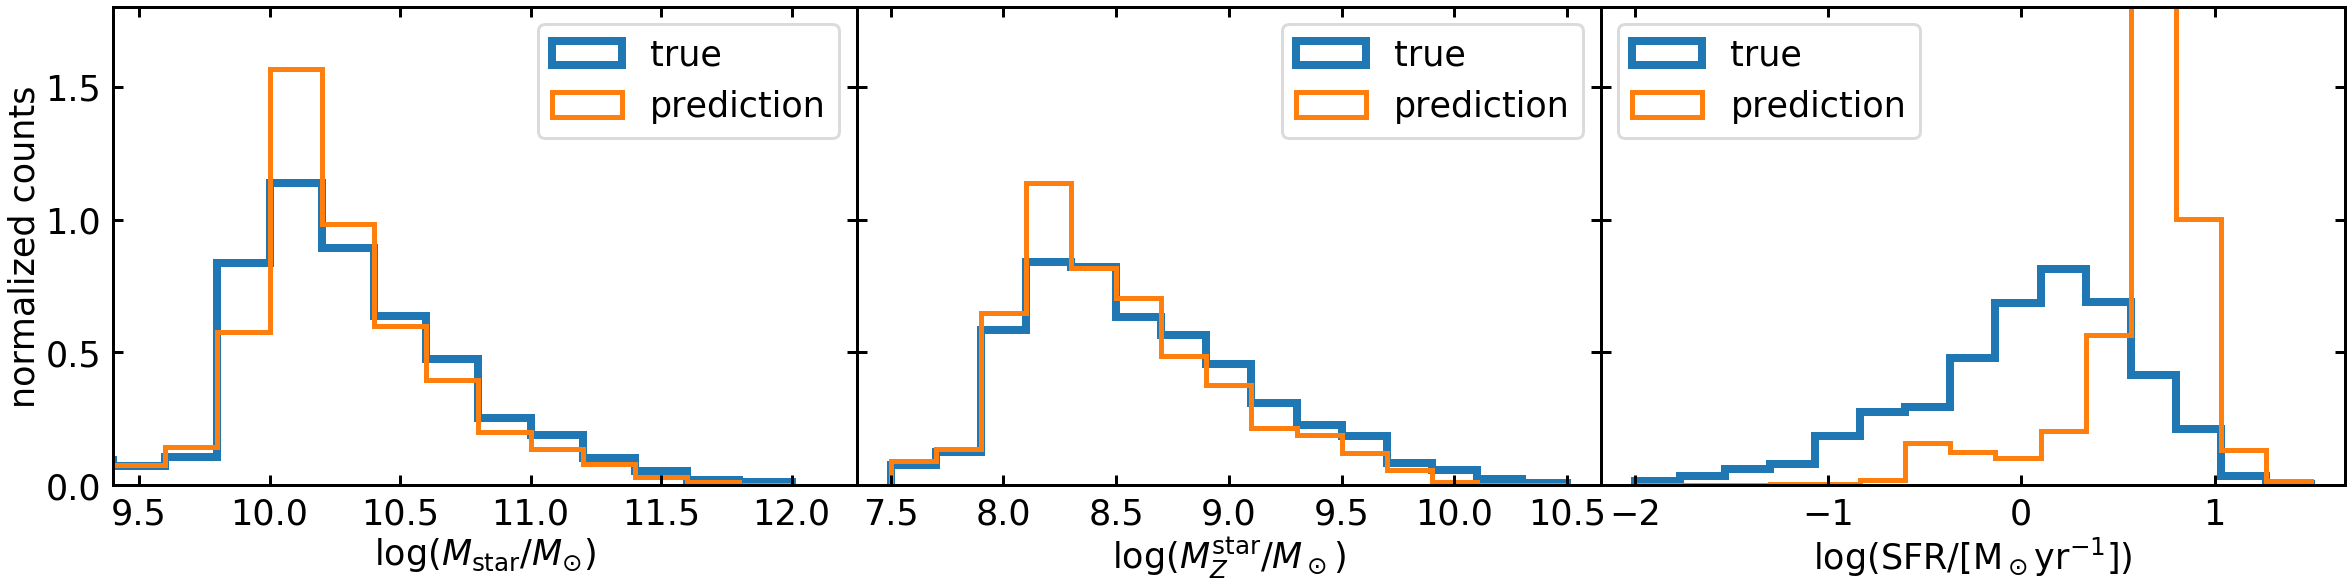

In [9]:
# histogram of global stellar properties
plt.figure(figsize=(40,8.8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[.6])
gs.update(hspace=0.0, wspace=0.0)

ax = plt.subplot(gs[0])
ax.hist(np.log10(true['stars_Masses']),histtype='step',lw=8,bins=15,normed=True,range=(9.,12.),label='true')
ax.hist(np.log10(pred['stars_Masses']),histtype='step',lw=5,bins=15,normed=True,range=(9.,12.),label='prediction')
ax.set_xlabel(r'$\log(M_{\rm star}/M_{\odot})$')
ax.set_ylabel(r'normalized counts')
ax.legend(loc=1,fontsize=35)
ax.set_xlim(9.4,12.25)
ax.set_ylim(0,1.8)

ax1 = plt.subplot(gs[1])
ax1.hist(np.log10(true['stars_GFM_Metallicity']),histtype='step',normed=True,lw=8,bins=15,range=(7.5,10.5),label='true')
ax1.hist(np.log10(pred['stars_GFM_Metallicity']),histtype='step',normed=True,lw=5,bins=15,range=(7.5,10.5),label='prediction')
ax1.set_xlabel(r'$\log(M_{Z}^{\rm star}/M_\odot)$')
ax1.legend(loc=1,fontsize=35)
ax1.set_ylim(0,1.8)
ax1.set_yticklabels([])

ax2 = plt.subplot(gs[2])
ax2.hist(np.log10(true['gas_StarFormationRate']),histtype='step',normed=True,lw=8,bins=15,range=(-2,1.5),label='true')
ax2.hist(np.log10(pred['gas_StarFormationRate']),histtype='step',normed=True,lw=5,bins=15,range=(-2,1.5),label='prediction')
ax2.set_xlabel(r'$\log(\rm{SFR}/[M_\odot\rm{yr}^{-1}])$')
#ax2.hist((true['stars_GFM_StellarFormationTime_all']/(true['stars_Masses_all']/1.26e6)),histtype='step',normed=True,lw=8,bins=13,range=(0,12.5),label='true')
#ax2.hist((pred['stars_GFM_StellarFormationTime_all']/(pred['stars_Masses_all']/1.26e6)),histtype='step',normed=True,lw=5,bins=13,range=(0,12.5),label='prediction')
#ax2.set_xlabel(r'$\tau_{\rm star}$ [Gyr]')
ax2.legend(loc=2,fontsize=35)
ax2.set_ylim(0,1.8)
ax2.set_yticklabels([])

plt.savefig('./plots/star_hist_2rh_1500.pdf', bbox_inches='tight')

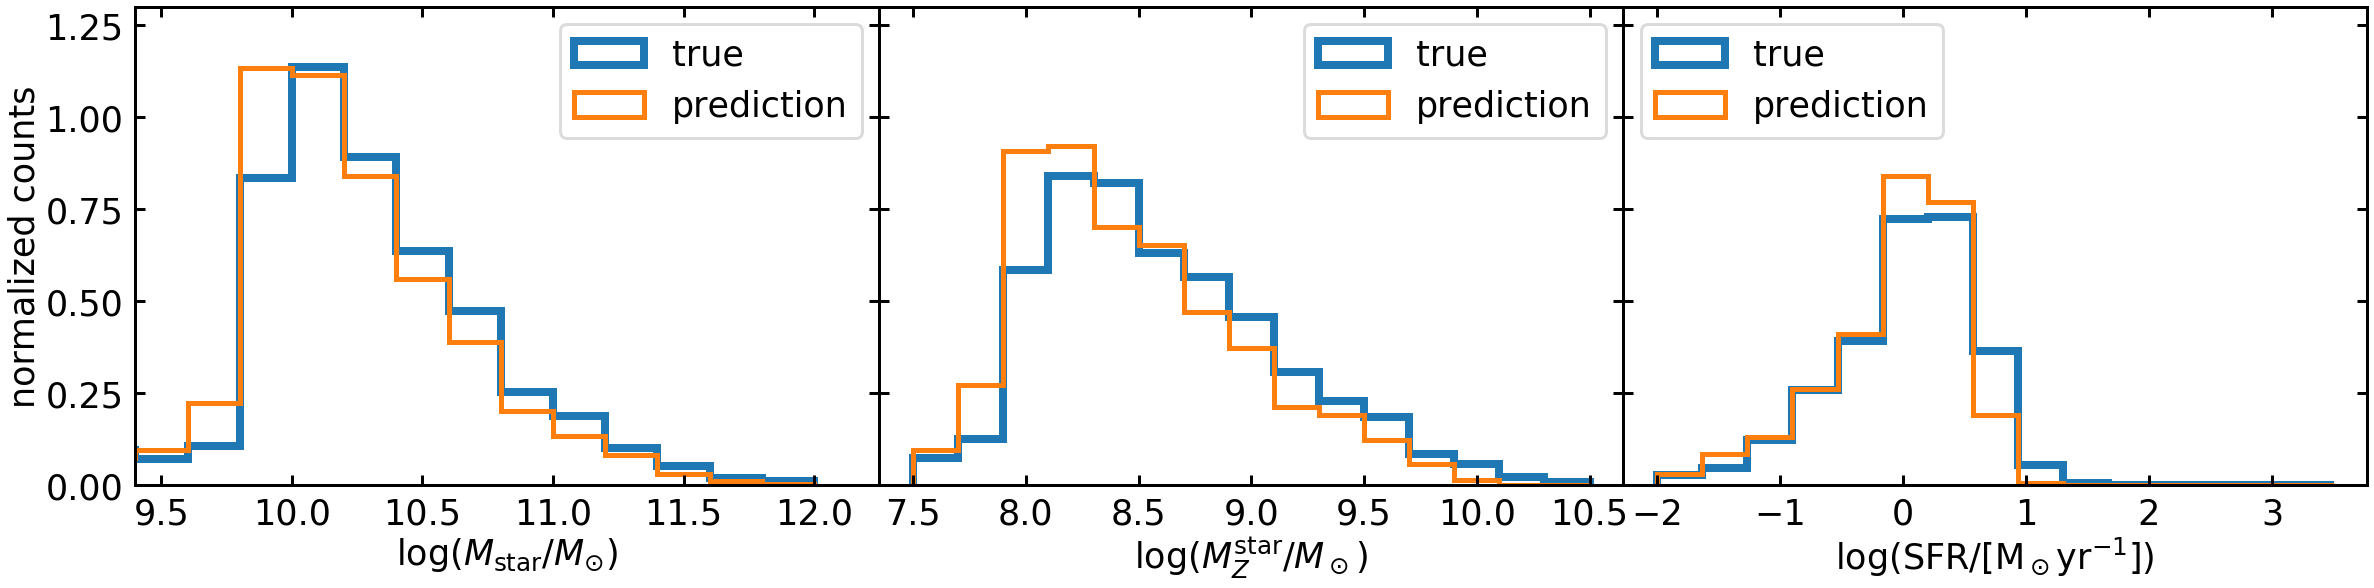

In [10]:
# histogram of global stellar properties
plt.figure(figsize=(40,8.8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[.6])
gs.update(hspace=0.0, wspace=0.0)

ax = plt.subplot(gs[0])
ax.hist(np.log10(true['stars_Masses']),histtype='step',lw=8,bins=15,normed=True,range=(9.,12.),label='true')
ax.hist(np.log10(masked['stars_Masses_masked_pred']),histtype='step',lw=5,bins=15,normed=True,range=(9.,12.),label='prediction')
ax.set_xlabel(r'$\log(M_{\rm star}/M_{\odot})$')
ax.set_ylabel(r'normalized counts')
ax.legend(loc=1,fontsize=35)
ax.set_xlim(9.4,12.25)
ax.set_ylim(0,1.3)

ax1 = plt.subplot(gs[1])
ax1.hist(np.log10(true['stars_GFM_Metallicity']),histtype='step',normed=True,lw=8,bins=15,range=(7.5,10.5),label='true')
ax1.hist(np.log10(masked['stars_GFM_Metallicity_masked_pred']),histtype='step',normed=True,lw=5,bins=15,range=(7.5,10.5),label='prediction')
ax1.set_xlabel(r'$\log(M_{Z}^{\rm star}/M_\odot)$')
ax1.legend(loc=1,fontsize=35)
ax1.set_ylim(0,1.3)
ax1.set_yticklabels([])

ax2 = plt.subplot(gs[2])
ax2.hist(np.log10(true['gas_StarFormationRate']),histtype='step',normed=True,lw=8,bins=15,range=(-2,3.5),label='true')
ax2.hist(np.log10(masked['gas_StarFormationRate_masked_pred']),histtype='step',normed=True,lw=5,bins=15,range=(-2,3.5),label='prediction')
ax2.set_xlabel(r'$\log(\rm{SFR}/[M_\odot\rm{yr}^{-1}])$')
#ax2.hist((true['stars_GFM_StellarFormationTime_all']/(true['stars_Masses_all']/1.26e6)),histtype='step',normed=True,lw=8,bins=13,range=(0,12.5),label='true')
#ax2.hist((pred['stars_GFM_StellarFormationTime_all']/(pred['stars_Masses_all']/1.26e6)),histtype='step',normed=True,lw=5,bins=13,range=(0,12.5),label='prediction')
#ax2.set_xlabel(r'$\tau_{\rm star}$ [Gyr]')
ax2.legend(loc=2,fontsize=35)
ax2.set_ylim(0,1.3)
ax2.set_yticklabels([])

plt.savefig('./plots/star_hist_2rh_masked_1500.pdf', bbox_inches='tight')

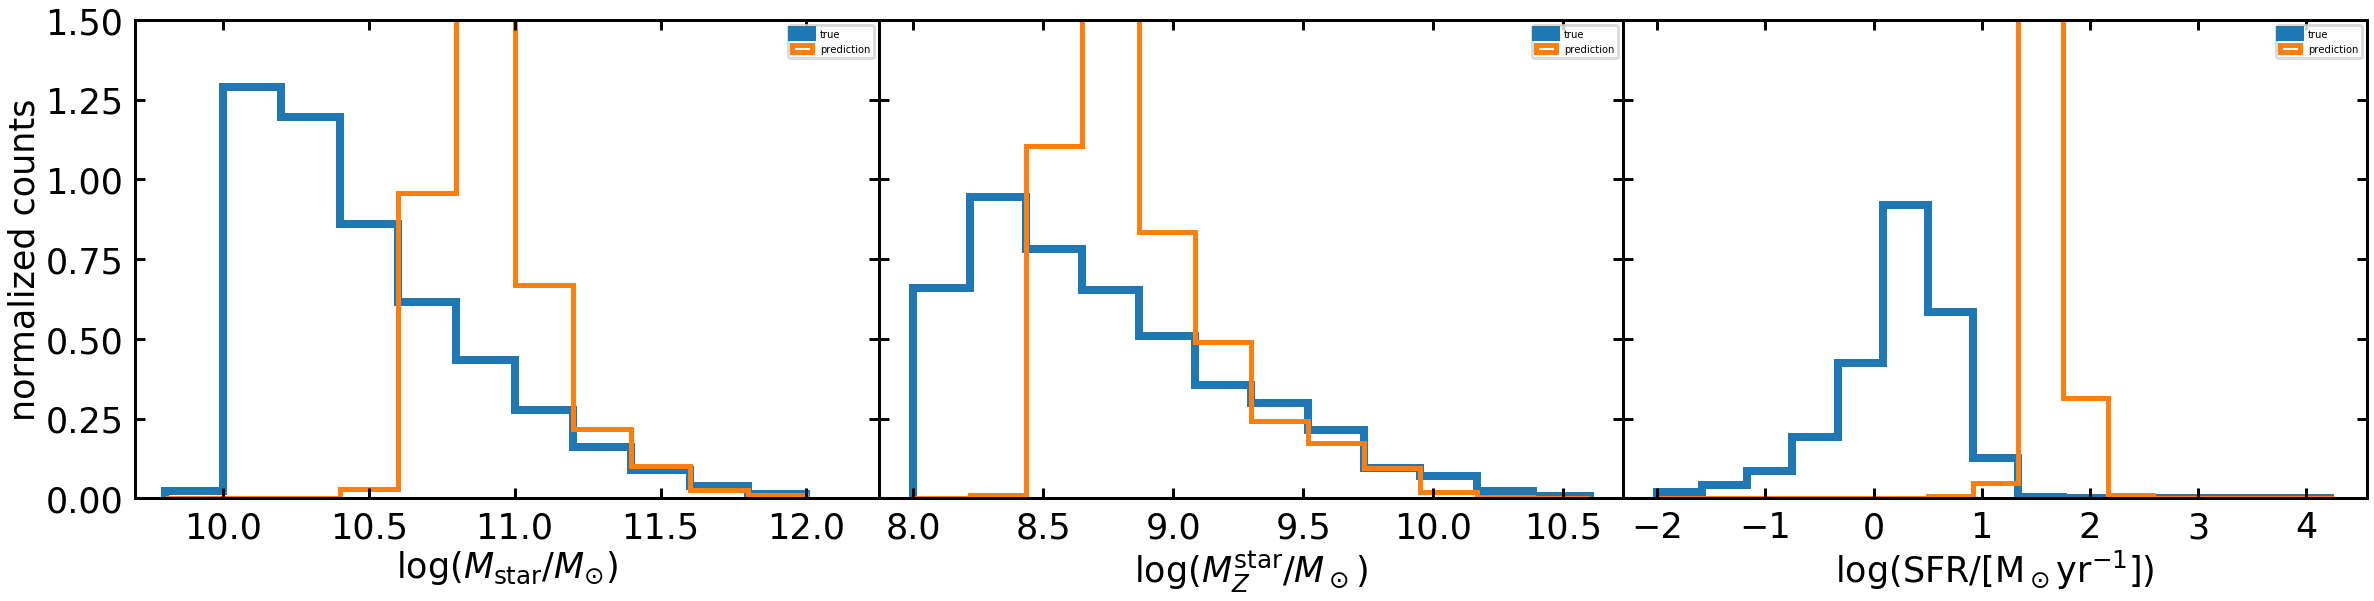

In [11]:
# histogram of global stellar properties
plt.figure(figsize=(40,8.8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[.6])
gs.update(hspace=0.0, wspace=0.0)

ax = plt.subplot(gs[0])
ax.hist(np.log10(true['stars_Masses_all']),histtype='step',lw=8,bins=11,normed=True,range=(9.8,12.),label='true')
ax.hist(np.log10(pred['stars_Masses_all']),histtype='step',lw=5,bins=11,normed=True,range=(9.8,12.),label='prediction')
ax.set_xlabel(r'$\log(M_{\rm star}/M_{\odot})$')
ax.set_ylabel(r'normalized counts')
ax.legend()
ax.set_xlim(9.7,12.25)
ax.set_ylim(0,1.5)

ax1 = plt.subplot(gs[1])
ax1.hist(np.log10(true['stars_GFM_Metallicity_all']),histtype='step',normed=True,lw=8,bins=12,range=(8,10.6),label='true')
ax1.hist(np.log10(pred['stars_GFM_Metallicity_all']),histtype='step',normed=True,lw=5,bins=12,range=(8,10.6),label='prediction')
ax1.set_xlabel(r'$\log(M_{Z}^{\rm star}/M_\odot)$')
ax1.legend()
ax1.set_ylim(0,1.5)
ax1.set_yticklabels([])

ax2 = plt.subplot(gs[2])
ax2.hist(np.log10(true['gas_StarFormationRate_all']),histtype='step',normed=True,lw=8,bins=15,range=(-2,4.25),label='true')
ax2.hist(np.log10(pred['gas_StarFormationRate_all']),histtype='step',normed=True,lw=5,bins=15,range=(-2,4.25),label='prediction')
ax2.set_xlabel(r'$\log(\rm{SFR}/[M_\odot\rm{yr}^{-1}])$')
#ax2.hist((true['stars_GFM_StellarFormationTime_all']/(true['stars_Masses_all']/1.26e6)),histtype='step',normed=True,lw=8,bins=13,range=(0,12.5),label='true')
#ax2.hist((pred['stars_GFM_StellarFormationTime_all']/(pred['stars_Masses_all']/1.26e6)),histtype='step',normed=True,lw=5,bins=13,range=(0,12.5),label='prediction')
#ax2.set_xlabel(r'$\tau_{\rm star}$ [Gyr]')
ax2.legend()
ax2.set_ylim(0,1.5)
ax2.set_yticklabels([])

plt.savefig('./plots/star_hist_1500.pdf', bbox_inches='tight')

In [37]:
np.nanmin(np.log10(true['gas_StarFormationRate_all']))

-inf

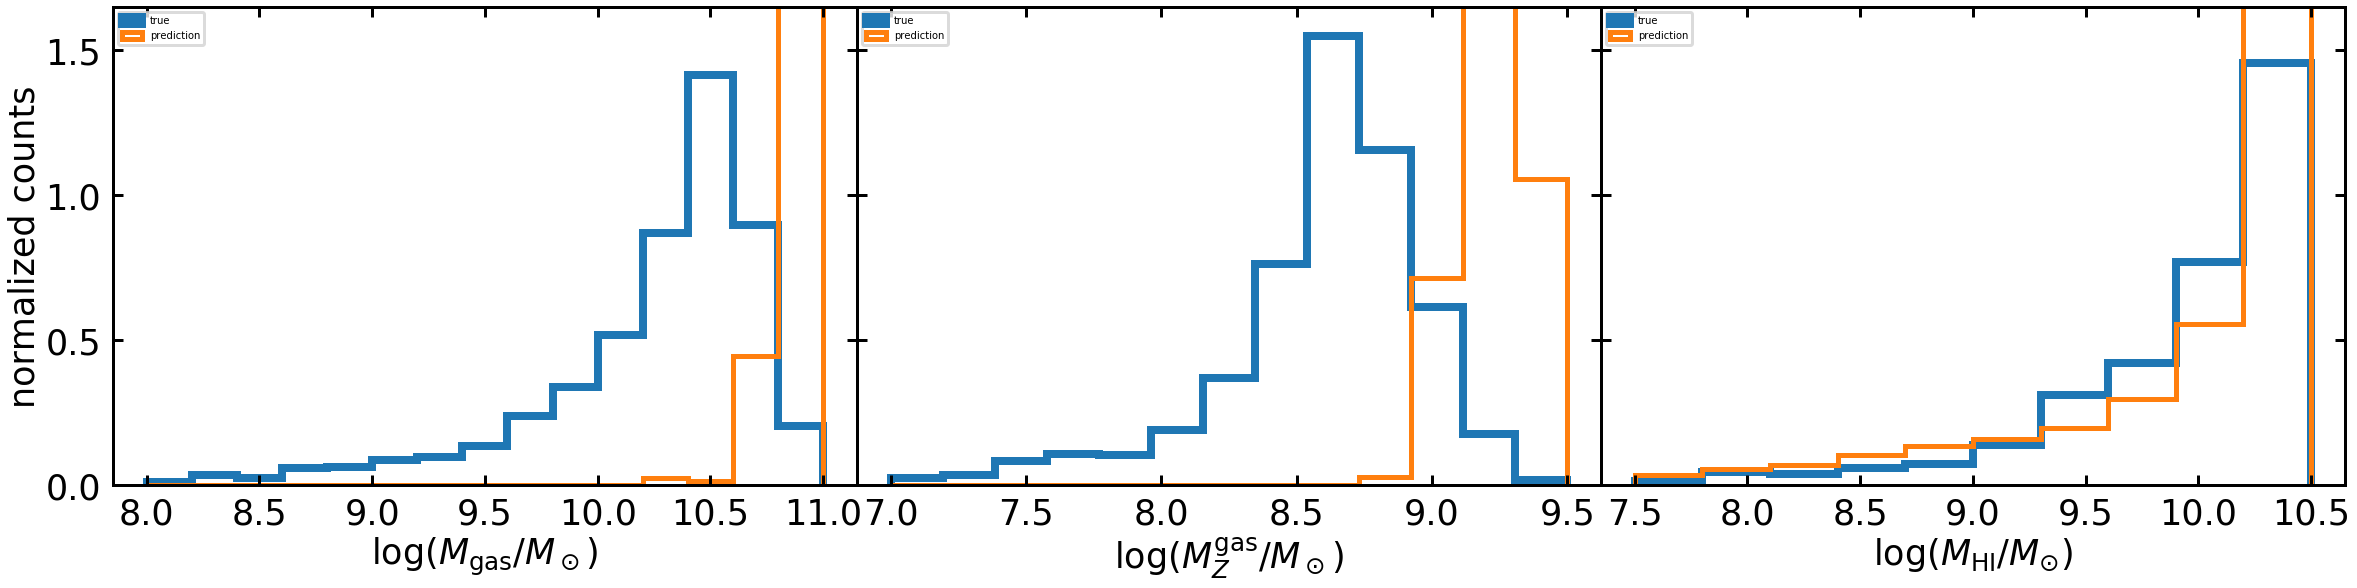

In [12]:
# histogram of global gaseous properties
plt.figure(figsize=(40,8.8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[.6])
gs.update(hspace=0.0, wspace=0.0)

ax = plt.subplot(gs[0])
ax.hist(np.log10(true['gas_Masses_all'][true['gas_Masses_all']!=0]),histtype='step',lw=8,bins=15,normed=True,range=(8,11.),label='true')
ax.hist(np.log10(pred['gas_Masses_all'][pred['gas_Masses_all']!=0]),histtype='step',lw=5,bins=15,normed=True,range=(8,11.),label='prediction')
ax.set_xlabel(r'$\log(M_{\rm gas}/M_\odot)$')
ax.set_ylabel(r'normalized counts')
ax.legend(loc=2)
#ax.set_xlim(9.5,12.25)
ax.set_ylim(0,1.65)

ax1 = plt.subplot(gs[1])
ax1.hist(np.log10(true['gas_GFM_Metallicity_all'][true['gas_GFM_Metallicity_all']!=0]),histtype='step',lw=8,bins=13,normed=True,range=(7.,9.5),label='true')
ax1.hist(np.log10(pred['gas_GFM_Metallicity_all'][pred['gas_GFM_Metallicity_all']!=0]),histtype='step',lw=5,bins=13,normed=True,range=(7.,9.5),label='prediction')
ax1.set_xlabel(r'$\log(M_{Z}^{\rm gas}/M_\odot)$')
ax1.legend(loc=2)
ax1.set_ylim(0,1.65)
ax1.set_yticklabels([])

ax2 = plt.subplot(gs[2])
ax2.hist(np.log10(true['gas_NeutralHydrogenAbundance_all']),histtype='step',normed=True,lw=8,bins=10,range=(7.5,10.5),label='true')
ax2.hist(np.log10(pred['gas_NeutralHydrogenAbundance_all']),histtype='step',normed=True,lw=5,bins=10,range=(7.5,10.5),label='prediction')
ax2.set_xlabel(r'$\log(M_{\rm{HI}}/M_{\odot})$')
ax2.legend(loc=2)
ax2.set_ylim(0,1.65)
ax2.set_yticklabels([])


plt.savefig('./plots/gas_hist_1500.pdf', bbox_inches='tight')

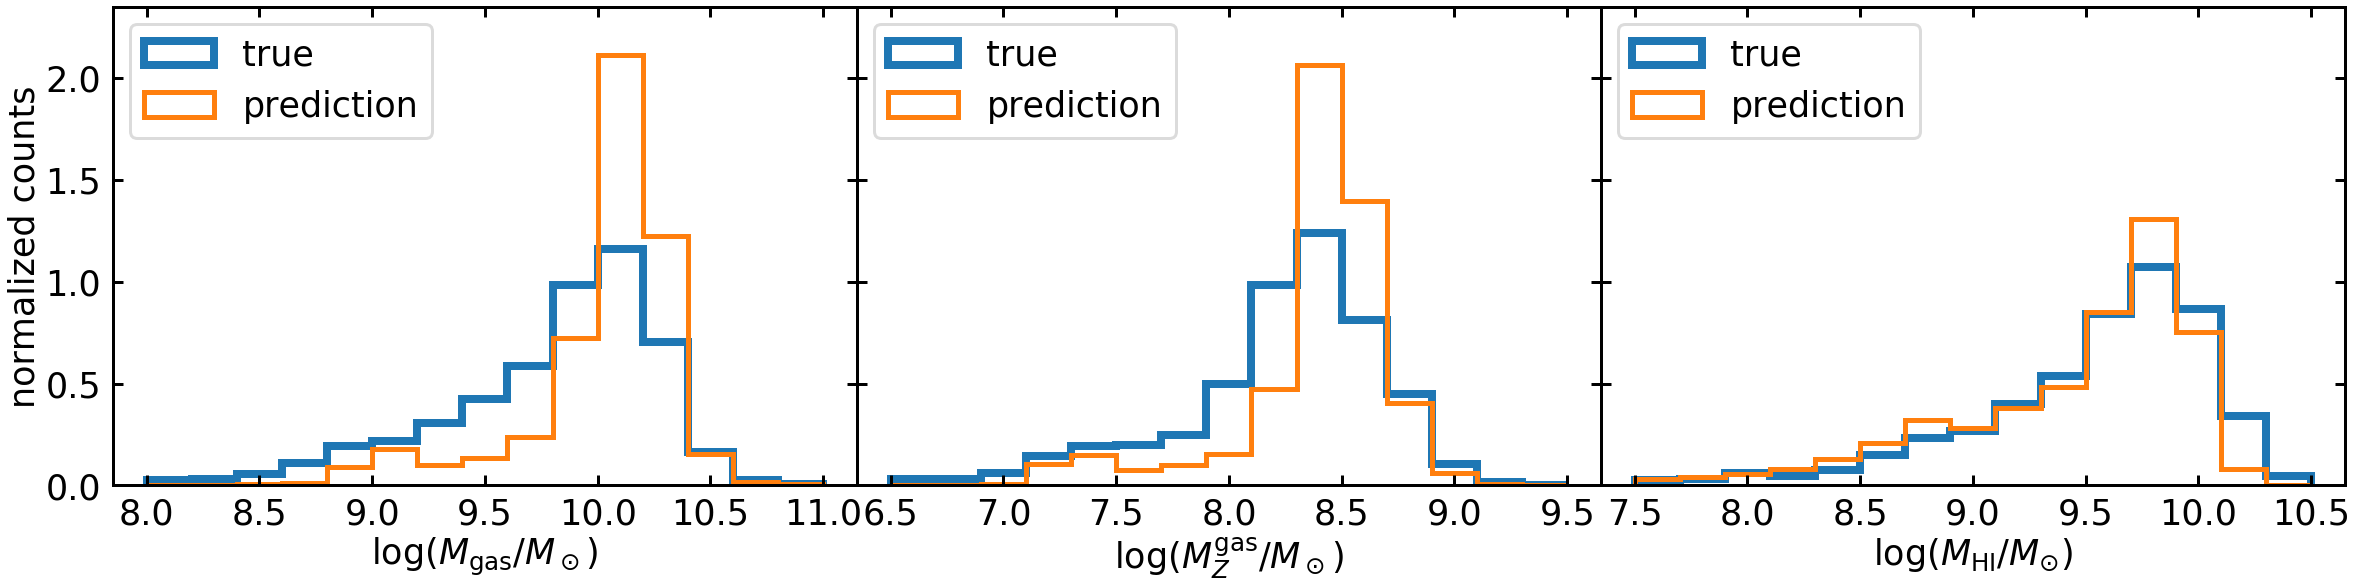

In [13]:
# histogram of global gaseous properties
plt.figure(figsize=(40,8.8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[.6])
gs.update(hspace=0.0, wspace=0.0)

ax = plt.subplot(gs[0])
ax.hist(np.log10(true['gas_Masses'][true['gas_Masses']!=0]),histtype='step',lw=8,bins=15,normed=True,range=(8,11.),label='true')
ax.hist(np.log10(pred['gas_Masses'][pred['gas_Masses']!=0]),histtype='step',lw=5,bins=15,normed=True,range=(8,11.),label='prediction')
ax.set_xlabel(r'$\log(M_{\rm gas}/M_\odot)$')
ax.set_ylabel(r'normalized counts')
ax.legend(loc=2,fontsize=35)
#ax.set_xlim(9.5,12.25)
ax.set_ylim(0,2.35)

ax1 = plt.subplot(gs[1])
ax1.hist(np.log10(true['gas_GFM_Metallicity'][true['gas_GFM_Metallicity']!=0]),histtype='step',lw=8,bins=15,normed=True,range=(6.5,9.5),label='true')
ax1.hist(np.log10(pred['gas_GFM_Metallicity'][pred['gas_GFM_Metallicity']!=0]),histtype='step',lw=5,bins=15,normed=True,range=(6.5,9.5),label='prediction')
ax1.set_xlabel(r'$\log(M_{Z}^{\rm gas}/M_\odot)$')
ax1.legend(loc=2,fontsize=35)
ax1.set_ylim(0,2.35)
ax1.set_yticklabels([])

ax2 = plt.subplot(gs[2])
ax2.hist(np.log10(true['gas_NeutralHydrogenAbundance']),histtype='step',normed=True,lw=8,bins=15,range=(7.5,10.5),label='true')
ax2.hist(np.log10(pred['gas_NeutralHydrogenAbundance']),histtype='step',normed=True,lw=5,bins=15,range=(7.5,10.5),label='prediction')
ax2.set_xlabel(r'$\log(M_{\rm{HI}}/M_{\odot})$')
ax2.legend(loc=2,fontsize=35)
ax2.set_ylim(0,2.35)
ax2.set_yticklabels([])


plt.savefig('./plots/gas_hist_2rh_1500.pdf', bbox_inches='tight')

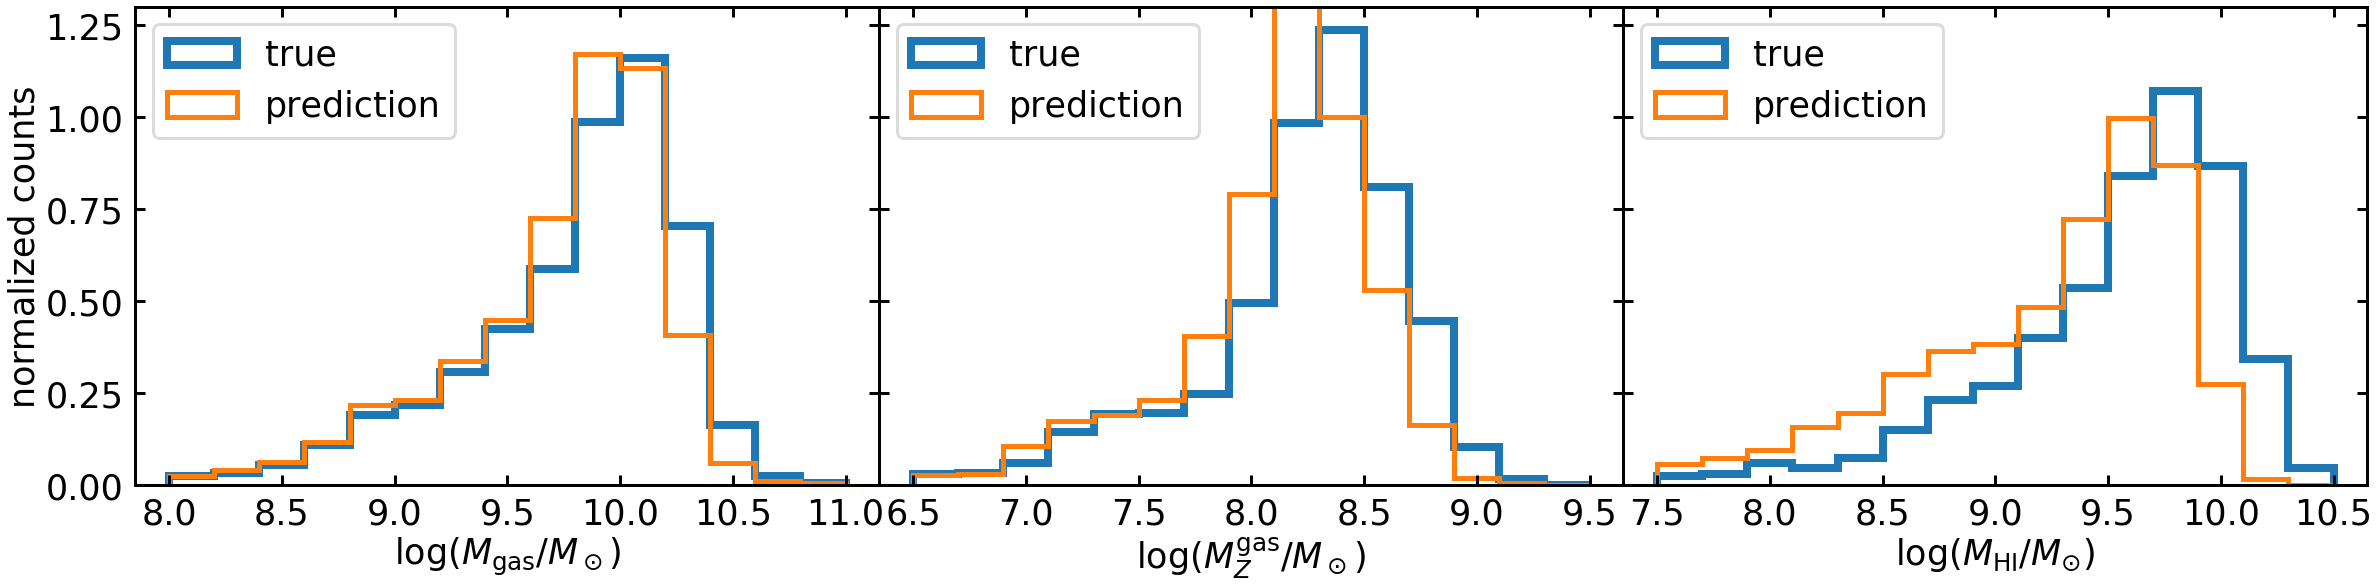

In [14]:
# histogram of global gaseous properties
plt.figure(figsize=(40,8.8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[.6])
gs.update(hspace=0.0, wspace=0.0)

ax = plt.subplot(gs[0])
ax.hist(np.log10(true['gas_Masses'][true['gas_Masses']!=0]),histtype='step',lw=8,bins=15,normed=True,range=(8,11.),label='true')
ax.hist(np.log10(masked['gas_Masses_masked_pred'][masked['gas_Masses_masked_pred']!=0]),histtype='step',lw=5,bins=15,normed=True,range=(8,11.),label='prediction')
ax.set_xlabel(r'$\log(M_{\rm gas}/M_\odot)$')
ax.set_ylabel(r'normalized counts')
ax.legend(loc=2,fontsize=35)
#ax.set_xlim(9.5,12.25)
ax.set_ylim(0,1.3)

ax1 = plt.subplot(gs[1])
ax1.hist(np.log10(true['gas_GFM_Metallicity'][true['gas_GFM_Metallicity']!=0]),histtype='step',lw=8,bins=15,normed=True,range=(6.5,9.5),label='true')
ax1.hist(np.log10(masked['gas_GFM_Metallicity_masked_pred'][masked['gas_GFM_Metallicity_masked_pred']!=0]),histtype='step',lw=5,bins=15,normed=True,range=(6.5,9.5),label='prediction')
ax1.set_xlabel(r'$\log(M_{Z}^{\rm gas}/M_\odot)$')
ax1.legend(loc=2,fontsize=35)
ax1.set_ylim(0,1.3)
ax1.set_yticklabels([])

ax2 = plt.subplot(gs[2])
ax2.hist(np.log10(true['gas_NeutralHydrogenAbundance']),histtype='step',normed=True,lw=8,bins=15,range=(7.5,10.5),label='true')
ax2.hist(np.log10(masked['gas_NeutralHydrogenAbundance_masked_pred']),histtype='step',normed=True,lw=5,bins=15,range=(7.5,10.5),label='prediction')
ax2.set_xlabel(r'$\log(M_{\rm{HI}}/M_{\odot})$')
ax2.legend(loc=2,fontsize=35)
ax2.set_ylim(0,1.3)
ax2.set_yticklabels([])


plt.savefig('./plots/gas_hist_2rh_masked_1500.pdf', bbox_inches='tight')

In [15]:
np.nanmax(np.log10((masked['stars_GFM_StellarFormationTime_masked_pred'])/(masked['stars_Masses_masked_pred']/1.26e6)))

1.1833469858002454

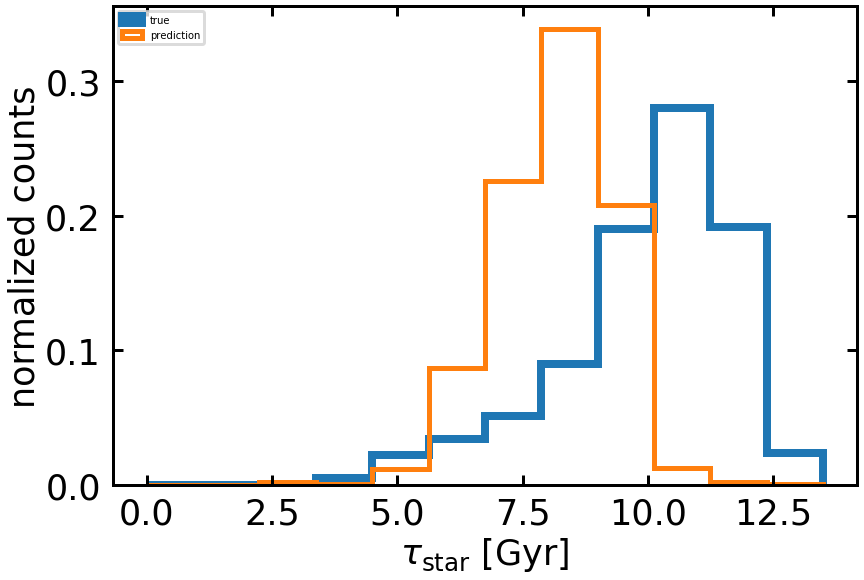

In [16]:
# stellar age histogram
plt.figure(figsize=(40/3,8.8))
ax3 = plt.subplot(111)
ax3.hist((true['stars_GFM_StellarFormationTime_all']/(true['stars_Masses_all']/1.26e6)),histtype='step',normed=True,lw=8,bins=12,range=(0,13.5),label='true')
ax3.hist((pred['stars_GFM_StellarFormationTime_all']/(pred['stars_Masses_all']/1.26e6)),histtype='step',normed=True,lw=5,bins=12,range=(0,13.5),label='prediction')
ax3.set_xlabel(r'$\tau_{\rm star}$ [Gyr]')
ax3.legend(loc=2)
#ax3.set_ylim(0,1.65)
#ax3.set_yticklabels([])
ax3.set_ylabel(r'normalized counts')

plt.savefig('./plots/age_hist_1500.pdf', bbox_inches='tight')

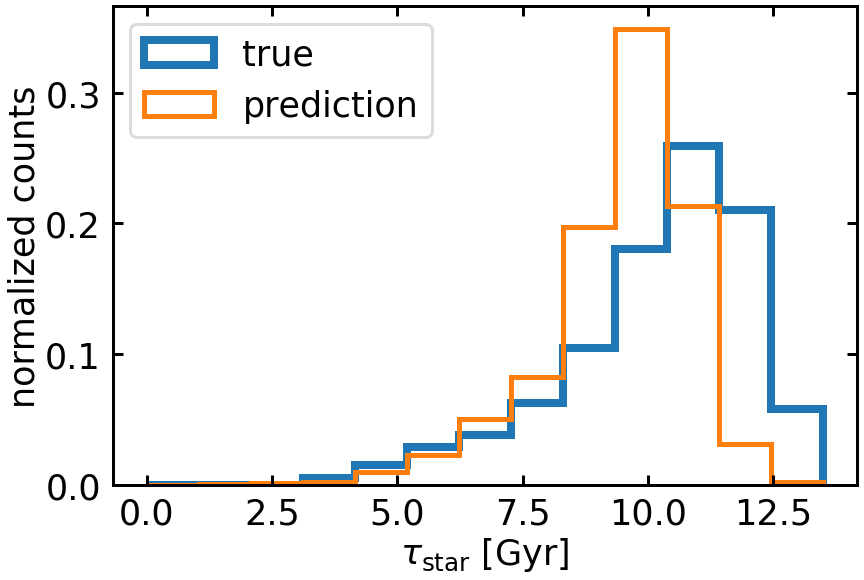

In [17]:
# stellar age histogram
plt.figure(figsize=(40/3,8.8))
ax3 = plt.subplot(111)
ax3.hist((true['stars_GFM_StellarFormationTime']/(true['stars_Masses']/1.26e6)),histtype='step',normed=True,lw=8,bins=13,range=(0,13.5),label='true')
ax3.hist((pred['stars_GFM_StellarFormationTime']/(pred['stars_Masses']/1.26e6)),histtype='step',normed=True,lw=5,bins=13,range=(0,13.5),label='prediction')
ax3.set_xlabel(r'$\tau_{\rm star}$ [Gyr]')
ax3.legend(loc=2, fontsize=35)
#ax3.set_ylim(0,1.65)
#ax3.set_yticklabels([])
ax3.set_ylabel(r'normalized counts')

plt.savefig('./plots/age_hist_2rh_1500.pdf', bbox_inches='tight')

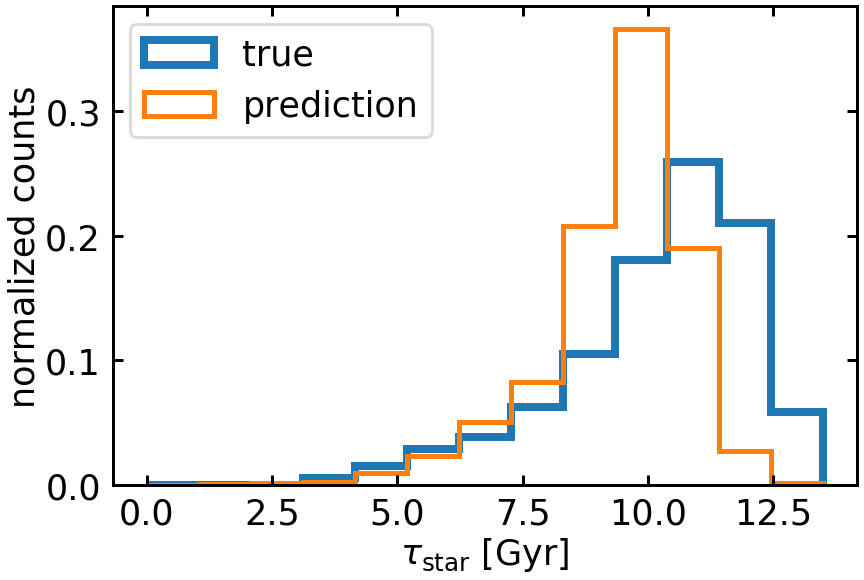

In [18]:
# stellar age histogram
plt.figure(figsize=(40/3,8.8))
ax3 = plt.subplot(111)
ax3.hist((true['stars_GFM_StellarFormationTime']/(true['stars_Masses']/1.26e6)),histtype='step',normed=True,lw=8,bins=13,range=(0,13.5),label='true')
ax3.hist((masked['stars_GFM_StellarFormationTime_masked_pred']/(masked['stars_Masses_masked_pred']/1.26e6)),histtype='step',normed=True,lw=5,bins=13,range=(0,13.5),label='prediction')
ax3.set_xlabel(r'$\tau_{\rm star}$ [Gyr]')
ax3.legend(loc=2, fontsize=35)
#ax3.set_ylim(0,1.65)
#ax3.set_yticklabels([])
ax3.set_ylabel(r'normalized counts')

plt.savefig('./plots/age_hist_2rh_masked_1500.pdf', bbox_inches='tight')

In [58]:
np.log10(13)

1.1139433523068367

# True vs. predicted within 2 Rhalf

Plotting predicted stars_Masses vs. true stars_Masses


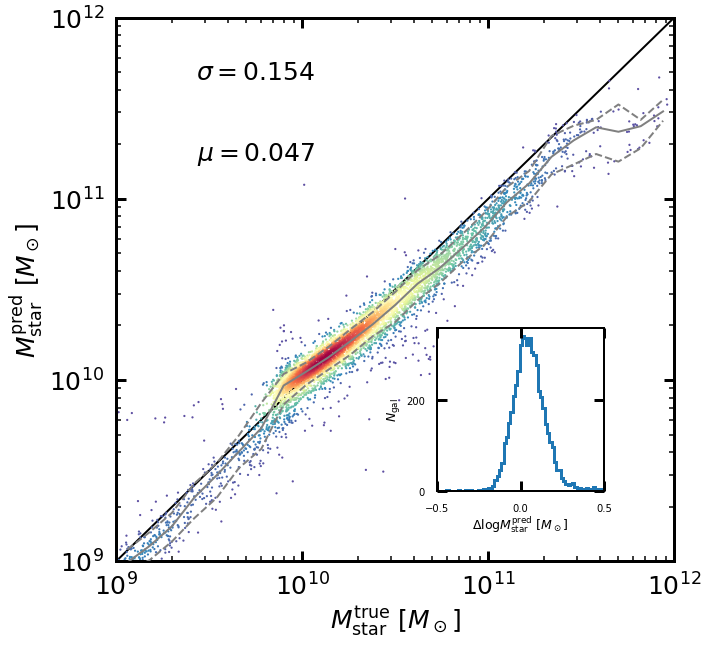

In [19]:
# stellar mass within 2 Rhalf
plot_keys = ['stars_Masses']
x_range = [(1e9, 1e12)]
xin_range = [(-0.5,0.5)]
ylabel = [r'$M_{\rm star}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$M_{\rm star}^{\rm true}$ [$M_\odot$]']

ax = statistics.plot_predicted_vs_true(true, pred, filename=f'./plots/predicted_vs_stars_masses_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted stars_Masses vs. true stars_Masses


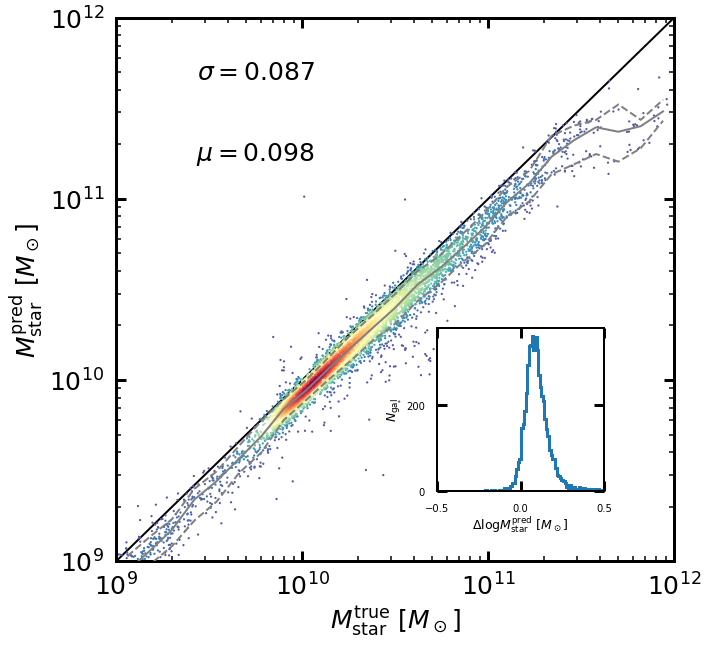

In [20]:
# stellar mass within 2 Rhalf
plot_keys = ['stars_Masses']
x_range = [(1e9, 1e12)]
xin_range = [(-0.5,0.5)]
ylabel = [r'$M_{\rm star}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$M_{\rm star}^{\rm true}$ [$M_\odot$]']

pred_mod ={}
pred_mod['stars_Masses'] = masked['stars_Masses_masked_pred']

ax = statistics.plot_predicted_vs_true(true, pred_mod, filename=f'./plots/predicted_vs_stars_masses_masked_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted stars_GFM_Metallicity vs. true stars_GFM_Metallicity


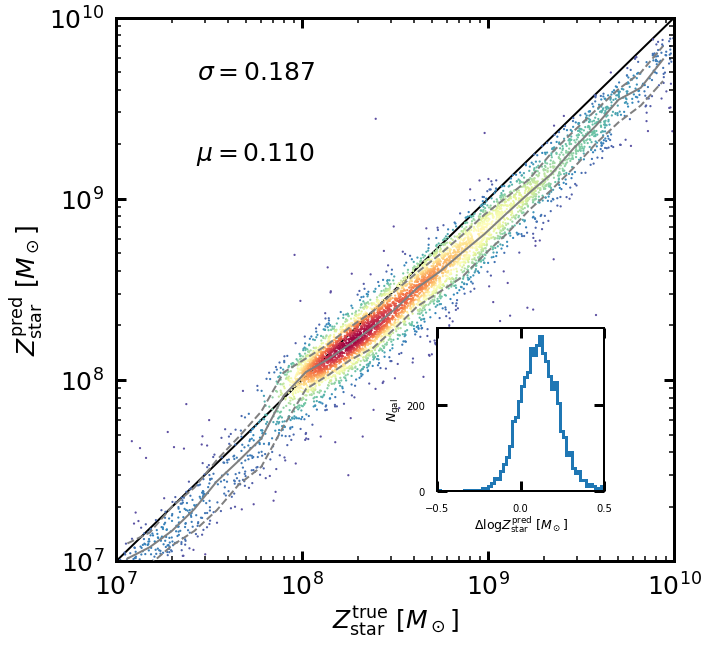

In [21]:
# stellar metallicitywithin 2 Rhalf
plot_keys = ['stars_GFM_Metallicity']
x_range = [(1e7, 1e10)]
xin_range = [(-.5,.5)]
ylabel = [r'$Z_{\rm star}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$Z_{\rm star}^{\rm true}$ [$M_\odot$]']

statistics.plot_predicted_vs_true(true, pred, filename=f'./plots/predicted_vs_true_stars_metals_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted stars_GFM_Metallicity vs. true stars_GFM_Metallicity


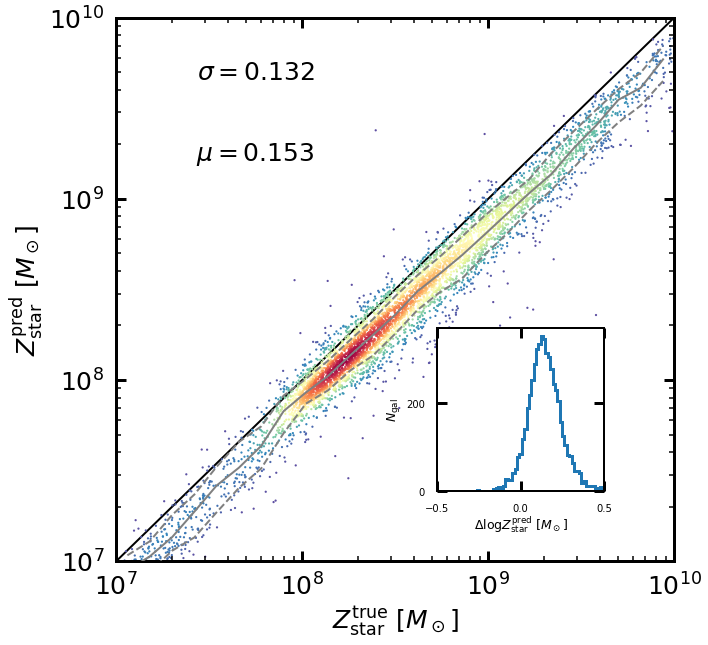

In [22]:
# stellar metallicitywithin 2 Rhalf
plot_keys = ['stars_GFM_Metallicity']
x_range = [(1e7, 1e10)]
xin_range = [(-.5,.5)]
ylabel = [r'$Z_{\rm star}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$Z_{\rm star}^{\rm true}$ [$M_\odot$]']

pred_mod ={}
pred_mod['stars_GFM_Metallicity'] = masked['stars_GFM_Metallicity_masked_pred']

statistics.plot_predicted_vs_true(true, pred_mod, filename=f'./plots/predicted_vs_true_stars_metals_masked_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')




Plotting predicted stars_GFM_StellarFormationTime vs. true stars_GFM_StellarFormationTime


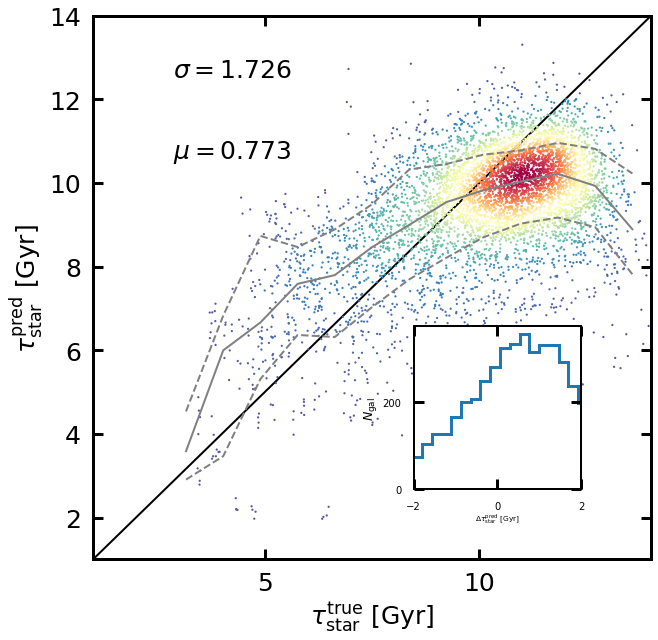

In [23]:
# stellar age within 2 Rhalf
plot_keys = ['stars_GFM_StellarFormationTime']
x_range = [(1, 14)]
xin_range = [(-2.,2.)]
ylabel = [r'$\tau_{\rm star}^{\rm pred}$ [Gyr]']
xlabel = [r'$\tau_{\rm star}^{\rm true}$ [Gyr]']
true_mod ={}
pred_mod ={}
true_mod['stars_GFM_StellarFormationTime'] = true['stars_GFM_StellarFormationTime']/(true['stars_Masses']/(1.26e6))
true_mod['stars_GFM_StellarFormationTime'] = true_mod['stars_GFM_StellarFormationTime'][np.isfinite(true_mod['stars_GFM_StellarFormationTime'])]
pred_mod['stars_GFM_StellarFormationTime'] = pred['stars_GFM_StellarFormationTime']/(pred['stars_Masses']/(1.26e6))
pred_mod['stars_GFM_StellarFormationTime'] = pred_mod['stars_GFM_StellarFormationTime'][np.isfinite(pred_mod['stars_GFM_StellarFormationTime'])]

statistics.plot_predicted_vs_true(true_mod, pred_mod, filename=f'predicted_vs_true_mod_stars_age_1500.pdf', axis=None, msize=5,logscale=False,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=15, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted stars_GFM_StellarFormationTime vs. true stars_GFM_StellarFormationTime


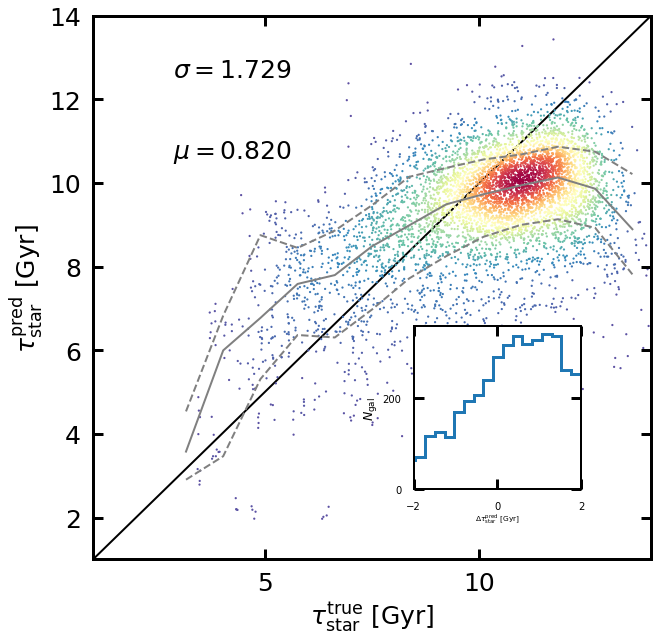

In [24]:
# stellar age within 2 Rhalf
plot_keys = ['stars_GFM_StellarFormationTime']
x_range = [(1, 14)]
xin_range = [(-2.,2.)]
ylabel = [r'$\tau_{\rm star}^{\rm pred}$ [Gyr]']
xlabel = [r'$\tau_{\rm star}^{\rm true}$ [Gyr]']
true_mod ={}
pred_mod ={}
true_mod['stars_GFM_StellarFormationTime'] = true['stars_GFM_StellarFormationTime']/(true['stars_Masses']/(1.26e6))
true_mod['stars_GFM_StellarFormationTime'] = true_mod['stars_GFM_StellarFormationTime'][np.isfinite(true_mod['stars_GFM_StellarFormationTime'])]
pred_mod['stars_GFM_StellarFormationTime'] = masked['stars_GFM_StellarFormationTime_masked_pred']/(masked['stars_Masses_masked_pred']/1.26e6)
pred_mod['stars_GFM_StellarFormationTime'] = pred_mod['stars_GFM_StellarFormationTime'][np.isfinite(pred_mod['stars_GFM_StellarFormationTime'])]

statistics.plot_predicted_vs_true(true_mod, pred_mod, filename=f'./plots/predicted_vs_true_mod_stars_age_masked_1500.pdf', axis=None, msize=5,logscale=False,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=15, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted stars_GFM_StellarFormationTime vs. true stars_GFM_StellarFormationTime


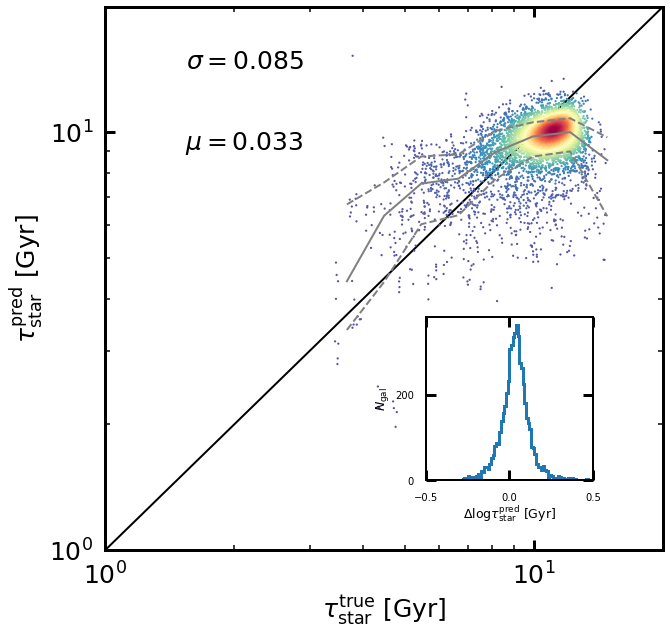

In [25]:
# stellar age within 2 Rhalf
plot_keys = ['stars_GFM_StellarFormationTime']
x_range = [(1, 20)]
xin_range = [(-.5,.5)]
ylabel = [r'$\tau_{\rm star}^{\rm pred}$ [Gyr]']
xlabel = [r'$\tau_{\rm star}^{\rm true}$ [Gyr]']
true_mod ={}
pred_mod ={}
true_mod['stars_GFM_StellarFormationTime'] = true['stars_GFM_StellarFormationTime']/(true['stars_Masses']/1.26e6)
true_mod['stars_GFM_StellarFormationTime'] = true_mod['stars_GFM_StellarFormationTime'][np.isfinite(true_mod['stars_GFM_StellarFormationTime'])]
pred_mod['stars_GFM_StellarFormationTime'] = masked['stars_GFM_StellarFormationTime_masked_pred']/(masked['stars_Masses_masked_pred']/1.26e6)
pred_mod['stars_GFM_StellarFormationTime'] = pred_mod['stars_GFM_StellarFormationTime'][np.isfinite(pred_mod['stars_GFM_StellarFormationTime'])]

statistics.plot_predicted_vs_true(true_mod, pred_mod, filename=f'./plots/predicted_vs_true_mod_stars_age_masked_log_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=15, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted stars_GFM_StellarFormationTime vs. true stars_GFM_StellarFormationTime


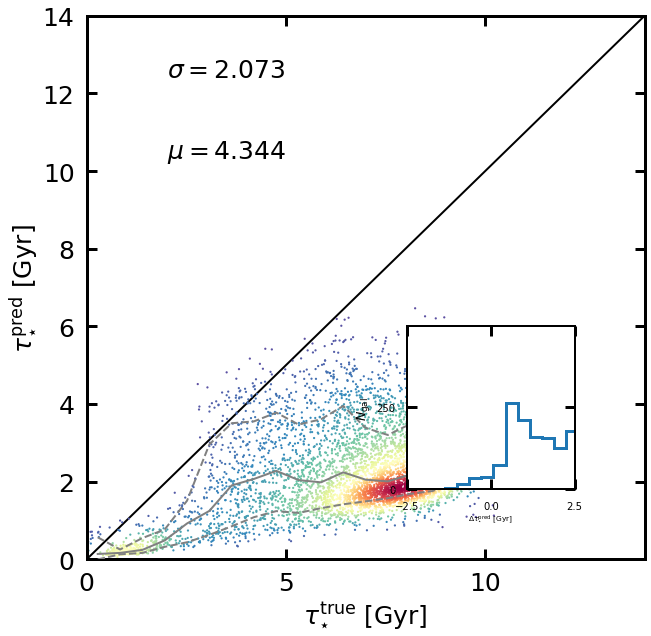

In [26]:
# stellar age within 2 Rhalf linear
plot_keys = ['stars_GFM_StellarFormationTime']
x_range = [(0, 14)]
xin_range = [(-2.5,2.5)]
ylabel = [r'$\tau_{\star}^{\rm pred}$ [Gyr]']
xlabel = [r'$\tau_{\star}^{\rm true}$ [Gyr]']
true_mod ={}
pred_mod ={}
true_mod['stars_GFM_StellarFormationTime'] = true['stars_GFM_StellarFormationTime']/(true['stars_Masses_all']/1.26e6)
pred_mod['stars_GFM_StellarFormationTime'] = pred['stars_GFM_StellarFormationTime']/(pred['stars_Masses_all']/1.26e6)

statistics.plot_predicted_vs_true(true_mod, pred_mod, filename=f'./plots/predicted_vs_true_mod_pp_stars_age_1500.pdf', axis=None, msize=5,logscale=False,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted gas_Masses vs. true gas_Masses


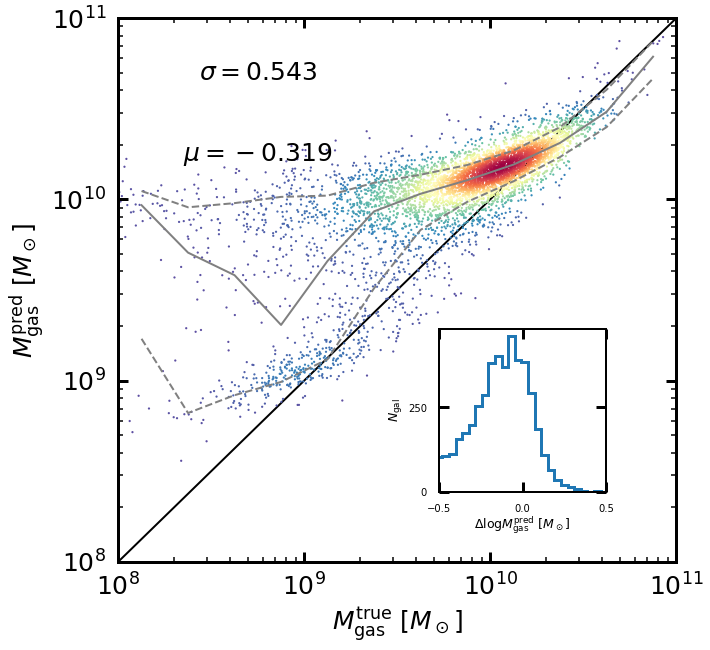

In [27]:
# gas mass within 2 Rhalf
plot_keys = ['gas_Masses']
x_range = [(1e8, 1e11)]
xin_range = [(-.5,.5)]
ylabel = [r'$M_{\rm gas}^{\rm pred}$ [$M_\odot$]']#, r'$Z_{\star}$', r'$\tau_{\star}$', r'$M_{\star}$']
xlabel = [r'$M_{\rm gas}^{\rm true}$ [$M_\odot$]']#, r'$Z_{\star}$', r'$\tau_{\star}$', r'$M_{\star}$']

statistics.plot_predicted_vs_true(true, pred, filename=f'./plots/predicted_vs_true_gas_masses_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=12, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted gas_Masses vs. true gas_Masses


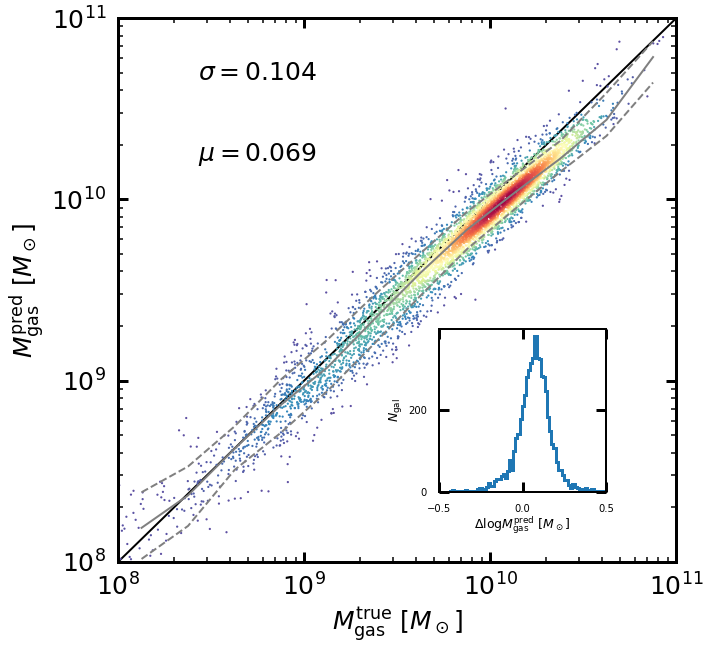

In [28]:
# gas mass within 2 Rhalf
plot_keys = ['gas_Masses']
x_range = [(1e8, 1e11)]
xin_range = [(-.5,.5)]
ylabel = [r'$M_{\rm gas}^{\rm pred}$ [$M_\odot$]']#, r'$Z_{\star}$', r'$\tau_{\star}$', r'$M_{\star}$']
xlabel = [r'$M_{\rm gas}^{\rm true}$ [$M_\odot$]']#, r'$Z_{\star}$', r'$\tau_{\star}$', r'$M_{\star}$']

pred_mod ={}
pred_mod['gas_Masses'] = masked['gas_Masses_masked_pred']

statistics.plot_predicted_vs_true(true, pred_mod, filename=f'./plots/predicted_vs_true_gas_masses_masked_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=12, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted gas_GFM_Metallicity vs. true gas_GFM_Metallicity


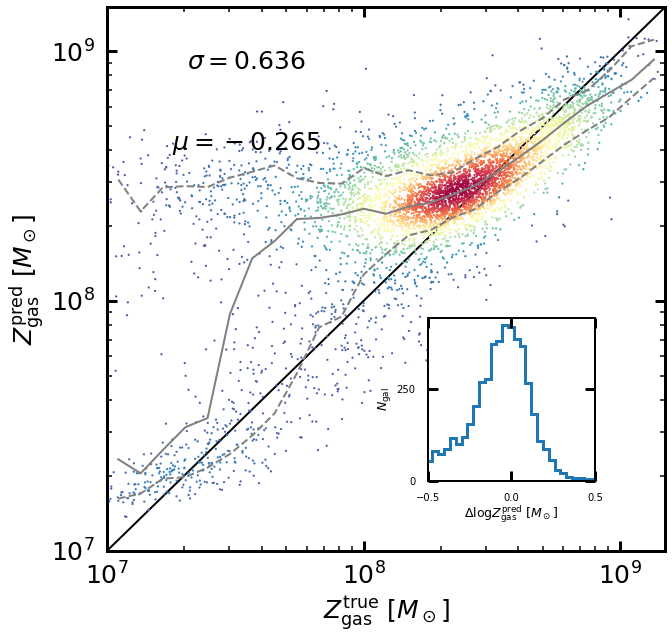

In [29]:
# gas metallicity within 2 Rhalf
plot_keys = ['gas_GFM_Metallicity']
x_range = [(1e7, 1.5e9)]
xin_range = [(-.5,.5)]
ylabel = [r'$Z_{\rm gas}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$Z_{\rm gas}^{\rm true}$ [$M_\odot$]']

statistics.plot_predicted_vs_true(true, pred, filename=f'./plots/predicted_vs_true_gas_metals_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel,ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted gas_GFM_Metallicity vs. true gas_GFM_Metallicity


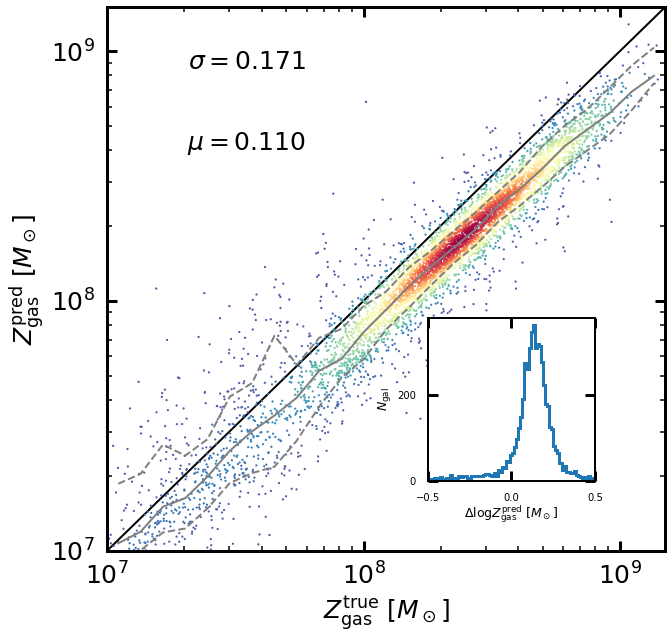

In [30]:
# gas metallicity within 2 Rhalf
plot_keys = ['gas_GFM_Metallicity']
x_range = [(1e7, 1.5e9)]
xin_range = [(-.5,.5)]
ylabel = [r'$Z_{\rm gas}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$Z_{\rm gas}^{\rm true}$ [$M_\odot$]']

pred_mod ={}
pred_mod['gas_GFM_Metallicity'] = masked['gas_GFM_Metallicity_masked_pred']

statistics.plot_predicted_vs_true(true, pred_mod, filename=f'./plots/predicted_vs_true_gas_metals_masked_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel,ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted gas_StarFormationRate vs. true gas_StarFormationRate


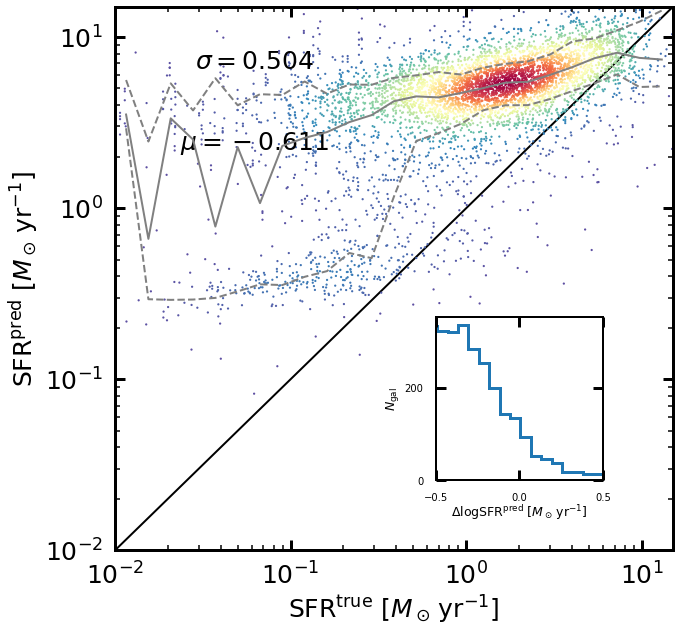

In [31]:
# SFR within 2 Rhalf
plot_keys = ['gas_StarFormationRate']
x_range = [(1e-2, 15)]
xin_range = [(-.5,.5)]
ylabel = [r'SFR$^{\rm pred}$ [$M_\odot\, \rm{yr}^{-1}$]']
xlabel = [r'SFR$^{\rm true}$ [$M_\odot\, \rm{yr}^{-1}$]']

statistics.plot_predicted_vs_true(true, pred, filename=f'./plots/predicted_vs_true_gas_SFR_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted gas_StarFormationRate vs. true gas_StarFormationRate


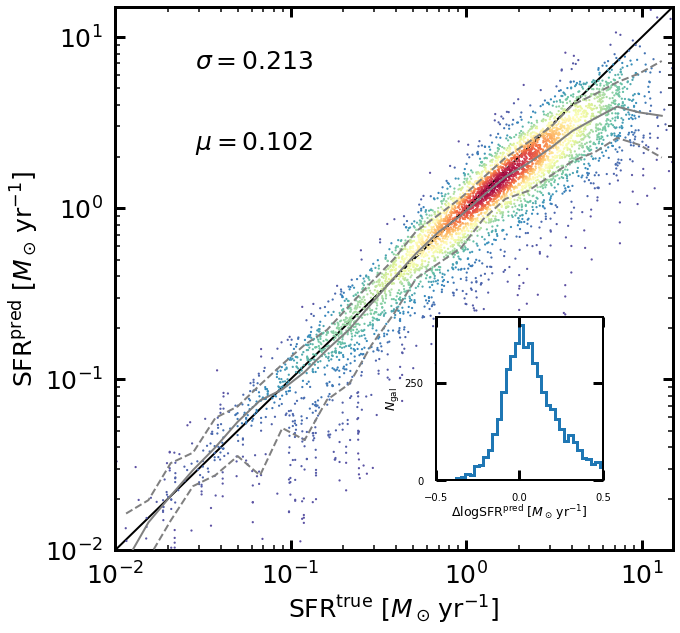

In [33]:
# SFR within 2 Rhalf
plot_keys = ['gas_StarFormationRate']
x_range = [(1e-2, 15)]
xin_range = [(-.5,.5)]
ylabel = [r'SFR$^{\rm pred}$ [$M_\odot\, \rm{yr}^{-1}$]']
xlabel = [r'SFR$^{\rm true}$ [$M_\odot\, \rm{yr}^{-1}$]']

pred_mod ={}
pred_mod['gas_StarFormationRate'] = masked['gas_StarFormationRate_masked_pred']

true_mod ={}
true_mod['gas_StarFormationRate'] = true['gas_StarFormationRate']

statistics.plot_predicted_vs_true(true_mod, pred_mod, filename=f'./plots/predicted_vs_true_gas_SFR_masked_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted gas_NeutralHydrogenAbundance vs. true gas_NeutralHydrogenAbundance


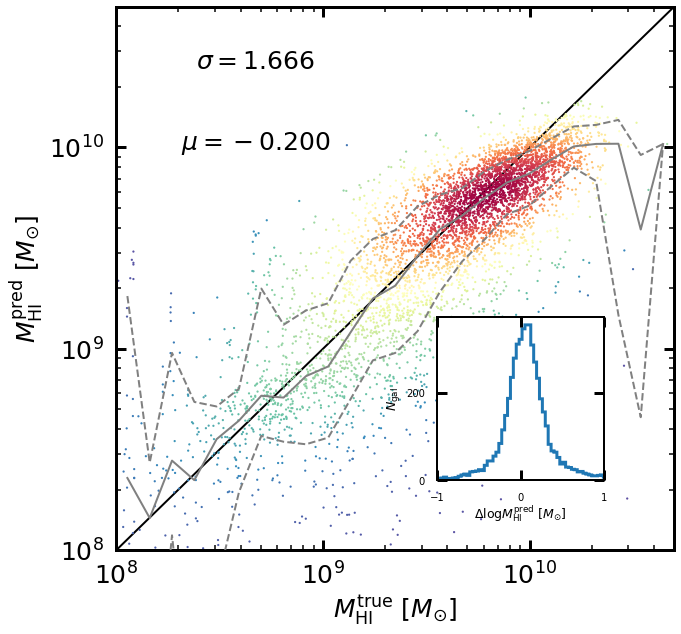

In [34]:
# HI mass within 2 Rhalf
plot_keys = ['gas_NeutralHydrogenAbundance']
x_range = [(1e8, 5e10)]
xin_range = [(-1.,1.)]
ylabel = [r'$M_{\rm{HI}}^{\rm pred}$ $[M_{\odot}]$']
xlabel = [r'$M_{\rm{HI}}^{\rm true}$ $[M_{\odot}]$']

statistics.plot_predicted_vs_true(true, pred, filename=f'./plots/predicted_vs_true_gas_HI_mass_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted gas_NeutralHydrogenAbundance vs. true gas_NeutralHydrogenAbundance


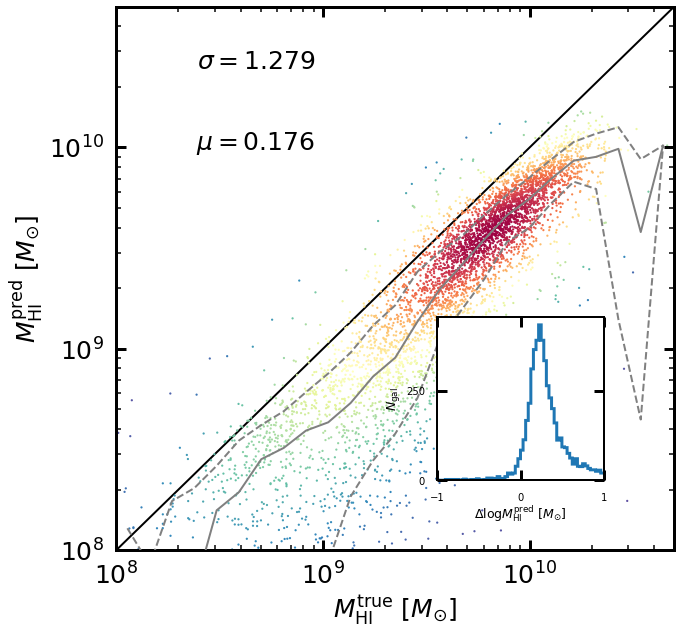

In [35]:
# HI mass within 2 Rhalf
plot_keys = ['gas_NeutralHydrogenAbundance']
x_range = [(1e8, 5e10)]
xin_range = [(-1.,1.)]
ylabel = [r'$M_{\rm{HI}}^{\rm pred}$ $[M_{\odot}]$']
xlabel = [r'$M_{\rm{HI}}^{\rm true}$ $[M_{\odot}]$']

pred_mod ={}
pred_mod['gas_NeutralHydrogenAbundance'] = masked['gas_NeutralHydrogenAbundance_masked_pred']

statistics.plot_predicted_vs_true(true, pred_mod, filename=f'./plots/predicted_vs_true_gas_HI_mass_masked_1500.pdf', axis=None, msize=5,logscale=True,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, figsize=(10, 10), histtype='step',mean_color='gray')

Plotting predicted stars_Masses vs. true stars_Masses
Plotting predicted gas_Masses vs. true gas_Masses
Plotting predicted stars_GFM_Metallicity vs. true stars_GFM_Metallicity
Plotting predicted gas_GFM_Metallicity vs. true gas_GFM_Metallicity
Plotting predicted stars_GFM_StellarFormationTime vs. true stars_GFM_StellarFormationTime
Plotting predicted gas_StarFormationRate vs. true gas_StarFormationRate


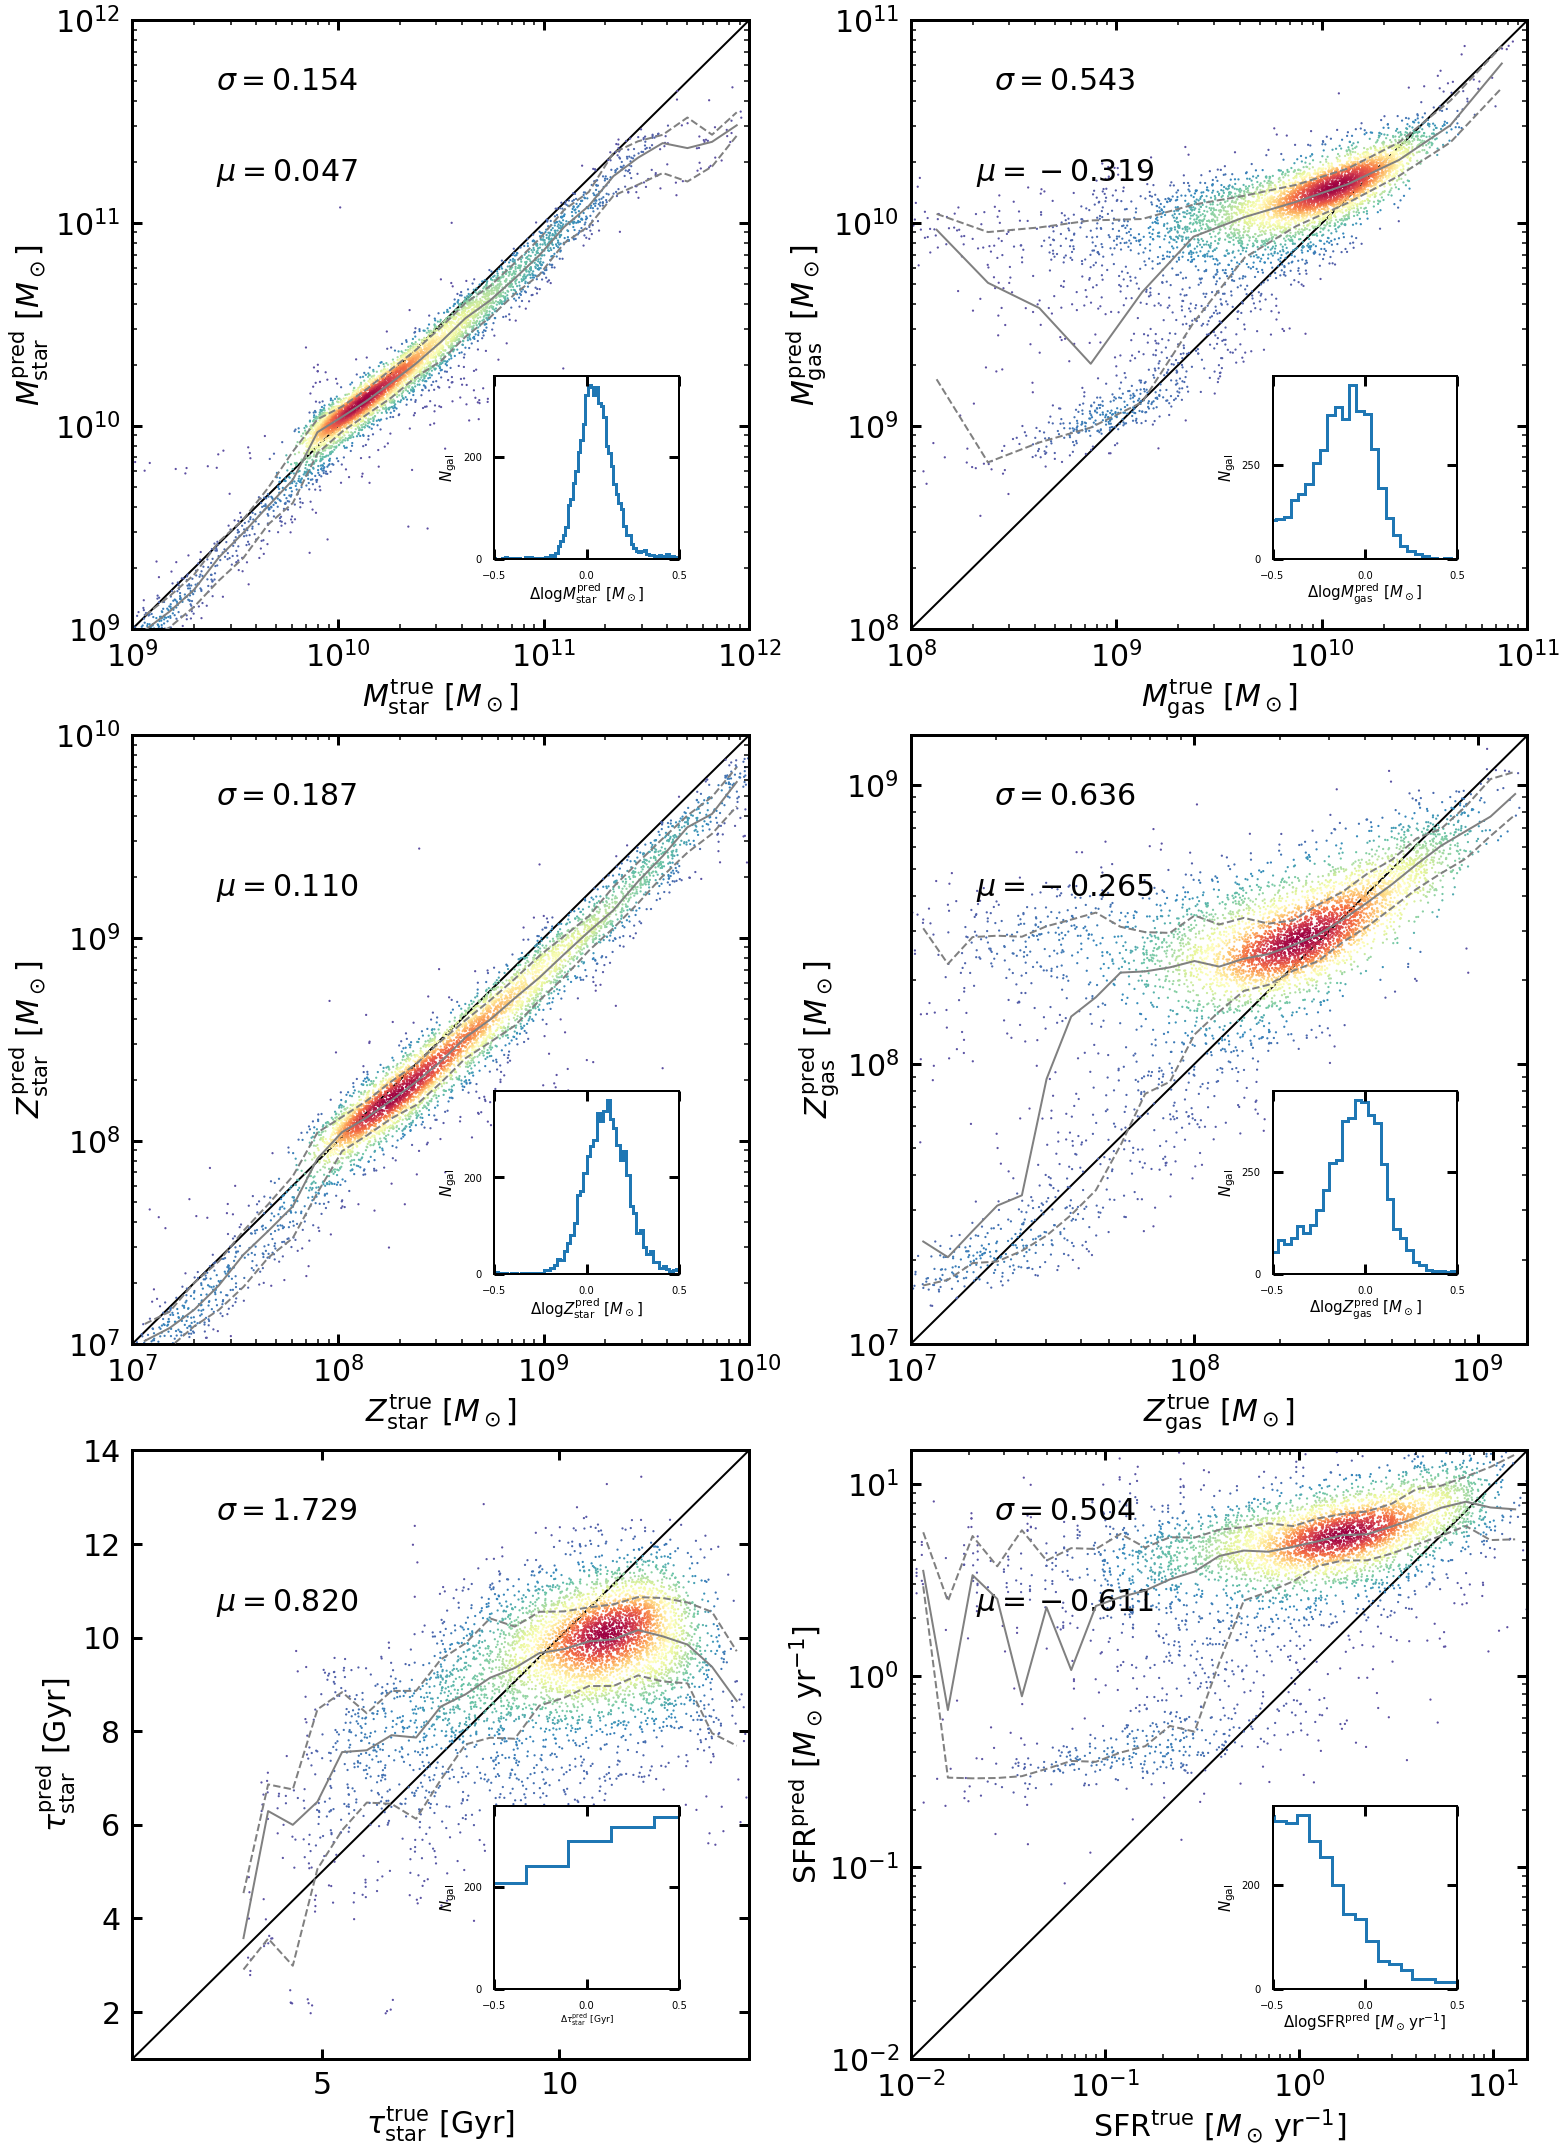

In [36]:
fig = plt.figure(figsize=(25,37.5))
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], height_ratios=[1,1,1])
gs.update(hspace=0.175, wspace=0.2625)

# stellar mass within 2 Rhalf
ax = plt.subplot(gs[0])
plot_keys = ['stars_Masses']
x_range = [(1e9, 1e12)]
xin_range = [(-0.5,0.5)]
ylabel = [r'$M_{\rm star}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$M_{\rm star}^{\rm true}$ [$M_\odot$]']

ax = statistics.plot_predicted_vs_true(true, pred, axis=[ax], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# gas mass within 2 Rhalf
ax1 = plt.subplot(gs[1])
plot_keys = ['gas_Masses']
x_range = [(1e8, 1e11)]
xin_range = [(-.5,.5)]
ylabel = [r'$M_{\rm gas}^{\rm pred}$ [$M_\odot$]']#, r'$Z_{\star}$', r'$\tau_{\star}$', r'$M_{\star}$']
xlabel = [r'$M_{\rm gas}^{\rm true}$ [$M_\odot$]']#, r'$Z_{\star}$', r'$\tau_{\star}$', r'$M_{\star}$']

statistics.plot_predicted_vs_true(true, pred, axis=[ax1], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=12, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# stellar metallicitywithin 2 Rhalf
ax2 = plt.subplot(gs[2])
plot_keys = ['stars_GFM_Metallicity']
x_range = [(1e7, 1e10)]
xin_range = [(-.5,.5)]
ylabel = [r'$Z_{\rm star}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$Z_{\rm star}^{\rm true}$ [$M_\odot$]']

statistics.plot_predicted_vs_true(true, pred, axis=[ax2], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# gas metallicity within 2 Rhalf
ax3 = plt.subplot(gs[3])
plot_keys = ['gas_GFM_Metallicity']
x_range = [(1e7, 1.5e9)]
xin_range = [(-.5,.5)]
ylabel = [r'$Z_{\rm gas}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$Z_{\rm gas}^{\rm true}$ [$M_\odot$]']

statistics.plot_predicted_vs_true(true, pred, axis=[ax3], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# stellar age within 2 Rhalf
ax4 = plt.subplot(gs[4])
plot_keys = ['stars_GFM_StellarFormationTime']
x_range = [(1, 14)]
xin_range = [(-0.5,0.5)]
ylabel = [r'$\tau_{\rm star}^{\rm pred}$ [Gyr]']
xlabel = [r'$\tau_{\rm star}^{\rm true}$ [Gyr]']
true_mod ={}
pred_mod ={}
true_mod['stars_GFM_StellarFormationTime'] = true['stars_GFM_StellarFormationTime']/(true['stars_Masses']/1.26e6)
true_mod['stars_GFM_StellarFormationTime'] = true_mod['stars_GFM_StellarFormationTime'][np.isfinite(true_mod['stars_GFM_StellarFormationTime'])]
pred_mod['stars_GFM_StellarFormationTime'] = masked['stars_GFM_StellarFormationTime_masked_pred']/(masked['stars_Masses_masked_pred']/1.26e6)
pred_mod['stars_GFM_StellarFormationTime'] = pred_mod['stars_GFM_StellarFormationTime'][np.isfinite(pred_mod['stars_GFM_StellarFormationTime'])]

statistics.plot_predicted_vs_true(true_mod, pred_mod, axis=[ax4], msize=5,logscale=False, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# SFR within 2 Rhalf
ax5 = plt.subplot(gs[5])
plot_keys = ['gas_StarFormationRate']
x_range = [(1e-2, 15)]
xin_range = [(-.5,.5)]
ylabel = [r'SFR$^{\rm pred}$ [$M_\odot\, \rm{yr}^{-1}$]']
xlabel = [r'SFR$^{\rm true}$ [$M_\odot\, \rm{yr}^{-1}$]']

statistics.plot_predicted_vs_true(true, pred, axis=[ax5], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

plt.savefig('./plots/predicted_vs_true_all_1500.pdf', bbox_inches='tight')

Plotting predicted stars_Masses vs. true stars_Masses
Plotting predicted gas_Masses vs. true gas_Masses
Plotting predicted stars_GFM_Metallicity vs. true stars_GFM_Metallicity
Plotting predicted gas_GFM_Metallicity vs. true gas_GFM_Metallicity
Plotting predicted stars_GFM_StellarFormationTime vs. true stars_GFM_StellarFormationTime
Plotting predicted gas_StarFormationRate vs. true gas_StarFormationRate


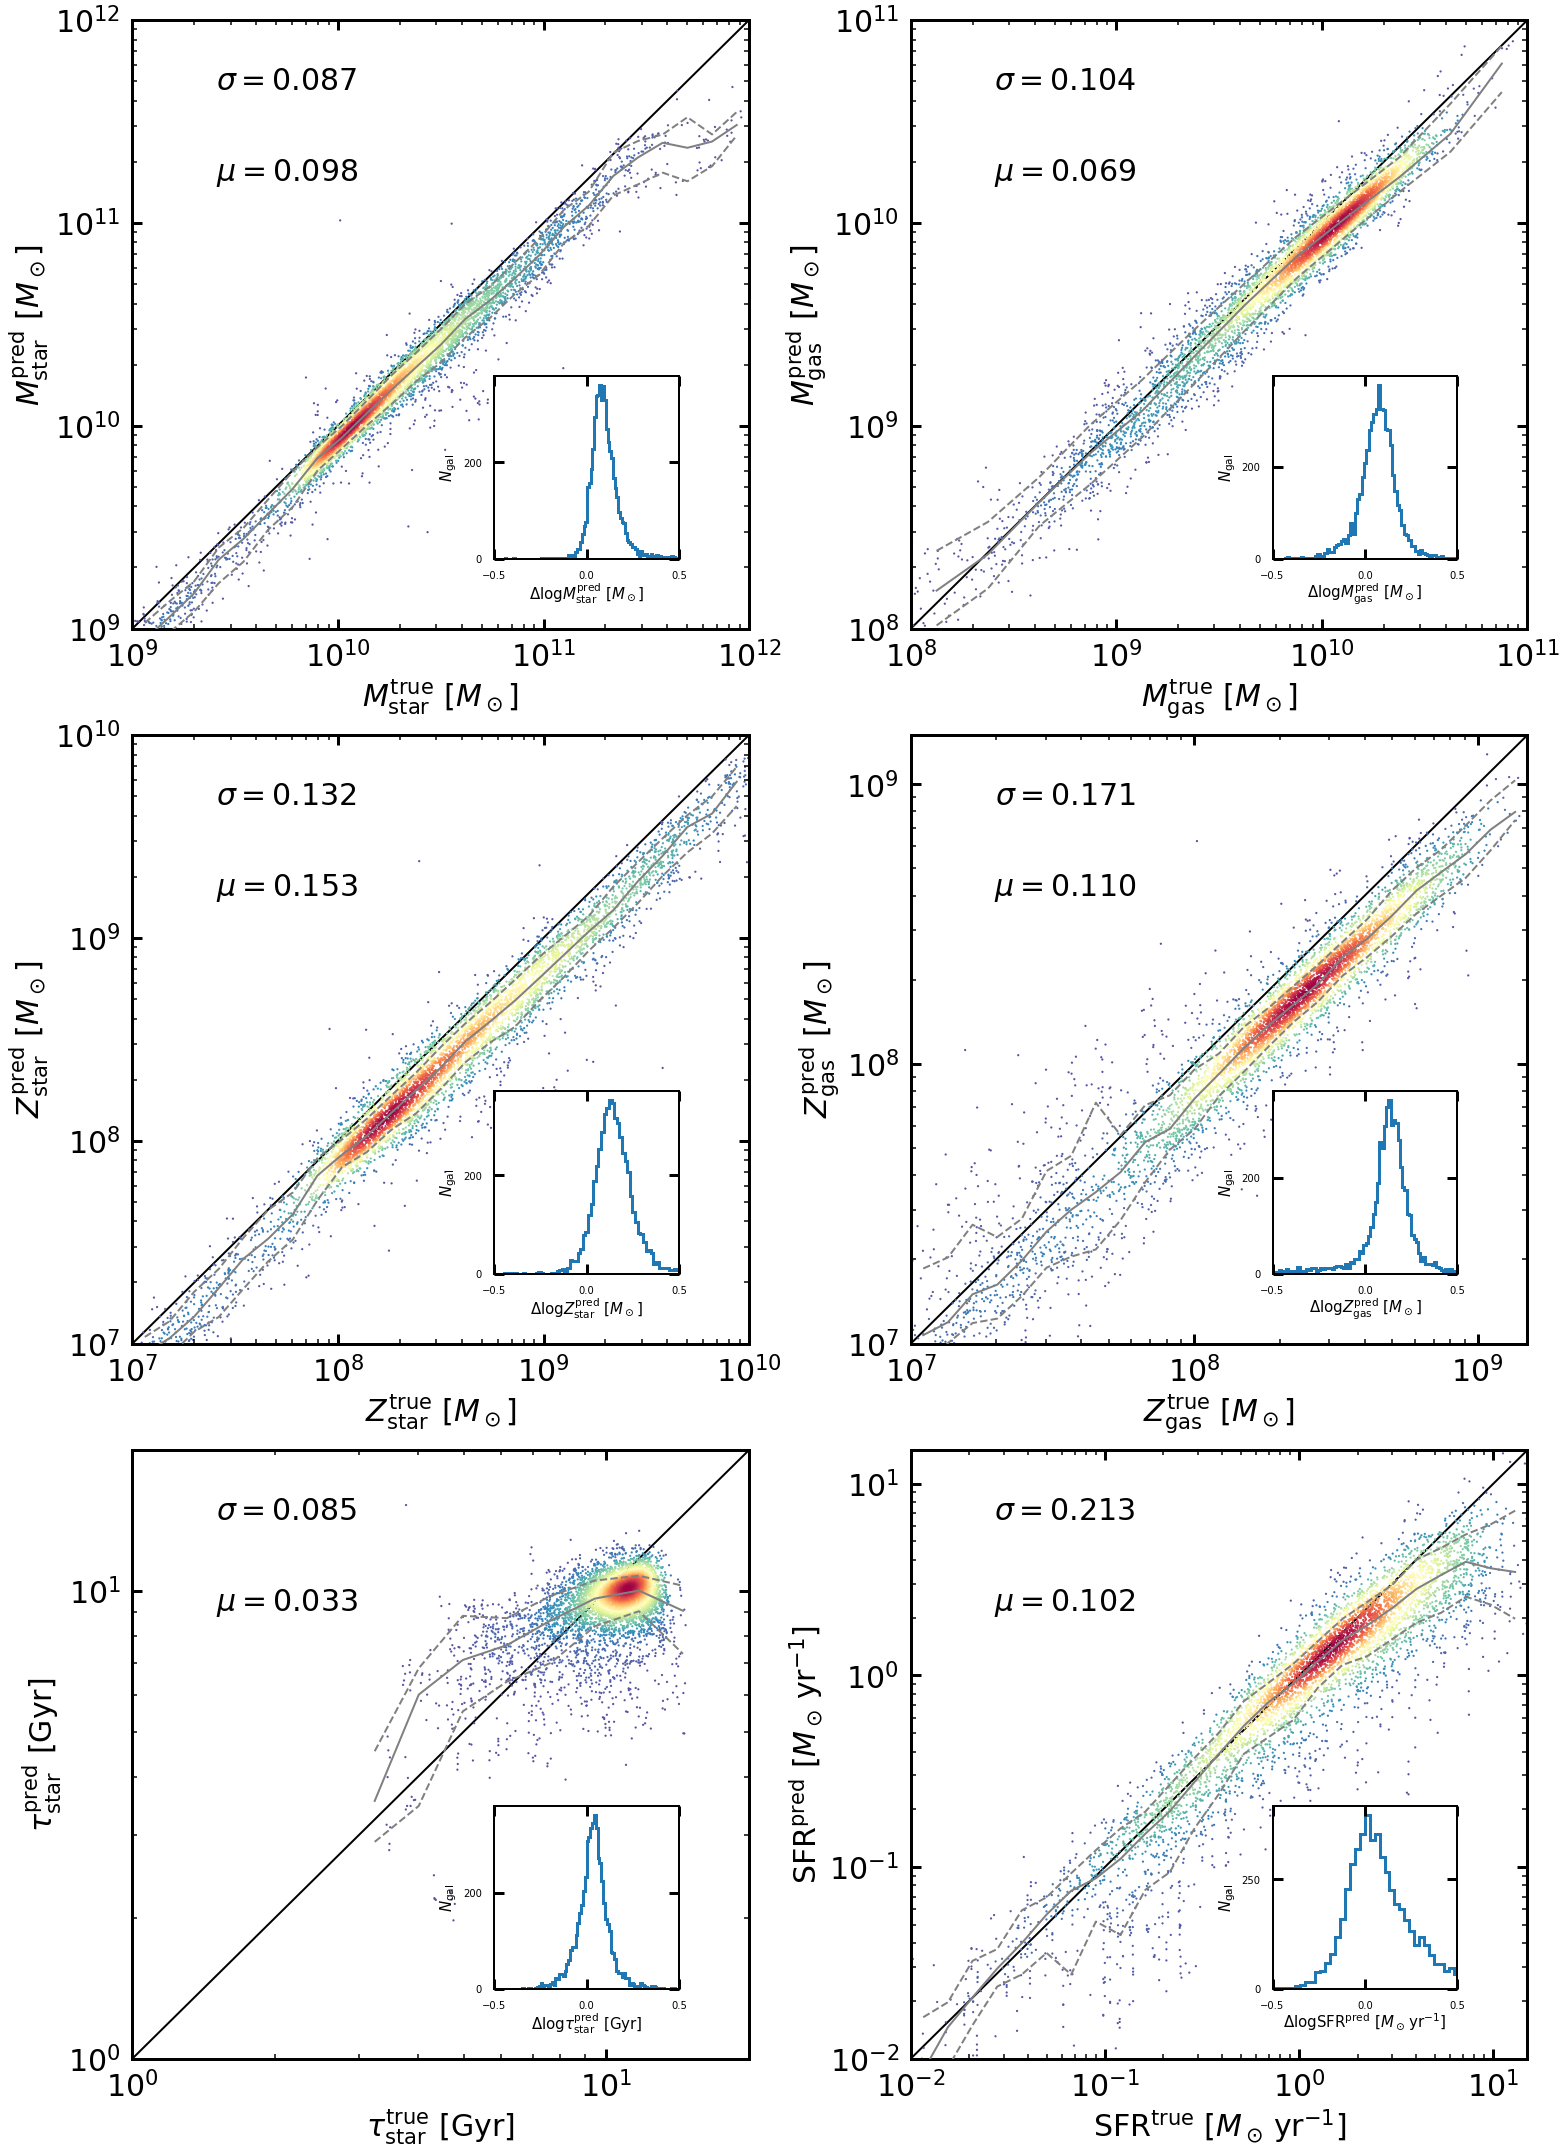

In [37]:
fig = plt.figure(figsize=(25,37.5))
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], height_ratios=[1,1,1])
gs.update(hspace=0.175, wspace=0.2625)

# stellar mass within 2 Rhalf
ax = plt.subplot(gs[0])
plot_keys = ['stars_Masses']
x_range = [(1e9, 1e12)]
xin_range = [(-0.5,0.5)]
ylabel = [r'$M_{\rm star}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$M_{\rm star}^{\rm true}$ [$M_\odot$]']

pred_mod ={}
pred_mod['stars_Masses'] = masked['stars_Masses_masked_pred']

ax = statistics.plot_predicted_vs_true(true, pred_mod, axis=[ax], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# gas mass within 2 Rhalf
ax1 = plt.subplot(gs[1])
plot_keys = ['gas_Masses']
x_range = [(1e8, 1e11)]
xin_range = [(-.5,.5)]
ylabel = [r'$M_{\rm gas}^{\rm pred}$ [$M_\odot$]']#, r'$Z_{\star}$', r'$\tau_{\star}$', r'$M_{\star}$']
xlabel = [r'$M_{\rm gas}^{\rm true}$ [$M_\odot$]']#, r'$Z_{\star}$', r'$\tau_{\star}$', r'$M_{\star}$']

pred_mod ={}
pred_mod['gas_Masses'] = masked['gas_Masses_masked_pred']

statistics.plot_predicted_vs_true(true, pred_mod, axis=[ax1], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=12, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# stellar metallicitywithin 2 Rhalf
ax2 = plt.subplot(gs[2])
plot_keys = ['stars_GFM_Metallicity']
x_range = [(1e7, 1e10)]
xin_range = [(-.5,.5)]
ylabel = [r'$Z_{\rm star}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$Z_{\rm star}^{\rm true}$ [$M_\odot$]']

pred_mod ={}
pred_mod['stars_GFM_Metallicity'] = masked['stars_GFM_Metallicity_masked_pred']

statistics.plot_predicted_vs_true(true, pred_mod, axis=[ax2], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# gas metallicity within 2 Rhalf
ax3 = plt.subplot(gs[3])
plot_keys = ['gas_GFM_Metallicity']
x_range = [(1e7, 1.5e9)]
xin_range = [(-.5,.5)]
ylabel = [r'$Z_{\rm gas}^{\rm pred}$ [$M_\odot$]']
xlabel = [r'$Z_{\rm gas}^{\rm true}$ [$M_\odot$]']

pred_mod ={}
pred_mod['gas_GFM_Metallicity'] = masked['gas_GFM_Metallicity_masked_pred']

statistics.plot_predicted_vs_true(true, pred_mod, axis=[ax3], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# stellar age within 2 Rhalf
ax4 = plt.subplot(gs[4])
plot_keys = ['stars_GFM_StellarFormationTime']
x_range = [(1, 20)]
xin_range = [(-.5,.5)]
ylabel = [r'$\tau_{\rm star}^{\rm pred}$ [Gyr]']
xlabel = [r'$\tau_{\rm star}^{\rm true}$ [Gyr]']
true_mod ={}
pred_mod ={}
true_mod['stars_GFM_StellarFormationTime'] = true['stars_GFM_StellarFormationTime']/(true['stars_Masses']/1.26e6)
true_mod['stars_GFM_StellarFormationTime'] = true_mod['stars_GFM_StellarFormationTime'][np.isfinite(true_mod['stars_GFM_StellarFormationTime'])]
pred_mod['stars_GFM_StellarFormationTime'] = masked['stars_GFM_StellarFormationTime_masked_pred']/(masked['stars_Masses_masked_pred']/1.26e6)
pred_mod['stars_GFM_StellarFormationTime'] = pred_mod['stars_GFM_StellarFormationTime'][np.isfinite(pred_mod['stars_GFM_StellarFormationTime'])]

statistics.plot_predicted_vs_true(true_mod, pred_mod, axis=[ax4], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=14, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

# SFR within 2 Rhalf
ax5 = plt.subplot(gs[5])
plot_keys = ['gas_StarFormationRate']
x_range = [(1e-2, 15)]
xin_range = [(-.5,.5)]
ylabel = [r'SFR$^{\rm pred}$ [$M_\odot\, \rm{yr}^{-1}$]']
xlabel = [r'SFR$^{\rm true}$ [$M_\odot\, \rm{yr}^{-1}$]']

pred_mod ={}
pred_mod['gas_StarFormationRate'] = masked['gas_StarFormationRate_masked_pred']

statistics.plot_predicted_vs_true(true, pred_mod, axis=[ax5], msize=5,logscale=True, fontsize=30,
    add_unity=True, contours=False, cmin=10, inset=True, density=True, colorbar=True, bins=25, plot_keys=plot_keys, x_range=x_range, 
    y_range=x_range, xin_range=xin_range, xlabel=xlabel, ylabel=ylabel, histtype='step',mean_color='gray')

plt.savefig('./plots/predicted_vs_true_all_masked_log_1500.pdf', bbox_inches='tight')

# Gradients

Plotting predicted stars_GFM_Metallicity_grad vs. true stars_GFM_Metallicity_grad
Plotting predicted stars_GFM_StellarFormationTime_grad vs. true stars_GFM_StellarFormationTime_grad
Plotting predicted stars_Masses_grad vs. true stars_Masses_grad


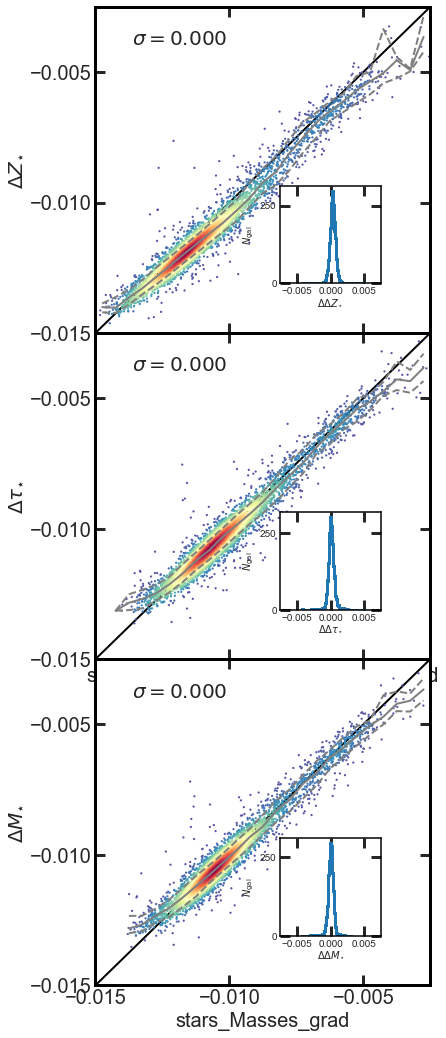

In [13]:
plot_keys = ['stars_GFM_Metallicity_grad', 'stars_GFM_StellarFormationTime_grad', 'stars_Masses_grad']
x_range = [(-.015, -.0025), (-.015, -.0025), (-.015, -.0025)]
xin_range = [(-.0075,.0075),(-0.0075,0.0075),(-0.0075,0.0075)]

ylabel = [r'$\Delta Z_{\star}$', r'$\Delta \tau_{\star}$', r'$\Delta M_{\star}$']

statistics.plot_predicted_vs_true(true, pred, filename=f'predicted_vs_true_grad_expl_quantiles_17.pdf', axis=None, msize=5,
    add_unity=True, contours=False, cmin=10, density=True, colorbar=True, bins=25, plot_keys=plot_keys, 
    x_range=x_range, y_range=x_range, xin_range=xin_range, ylabel=ylabel, figsize=(6, 18), histtype='step',
    mean_color='gray', inset=True)

# radial dependence of accuracy

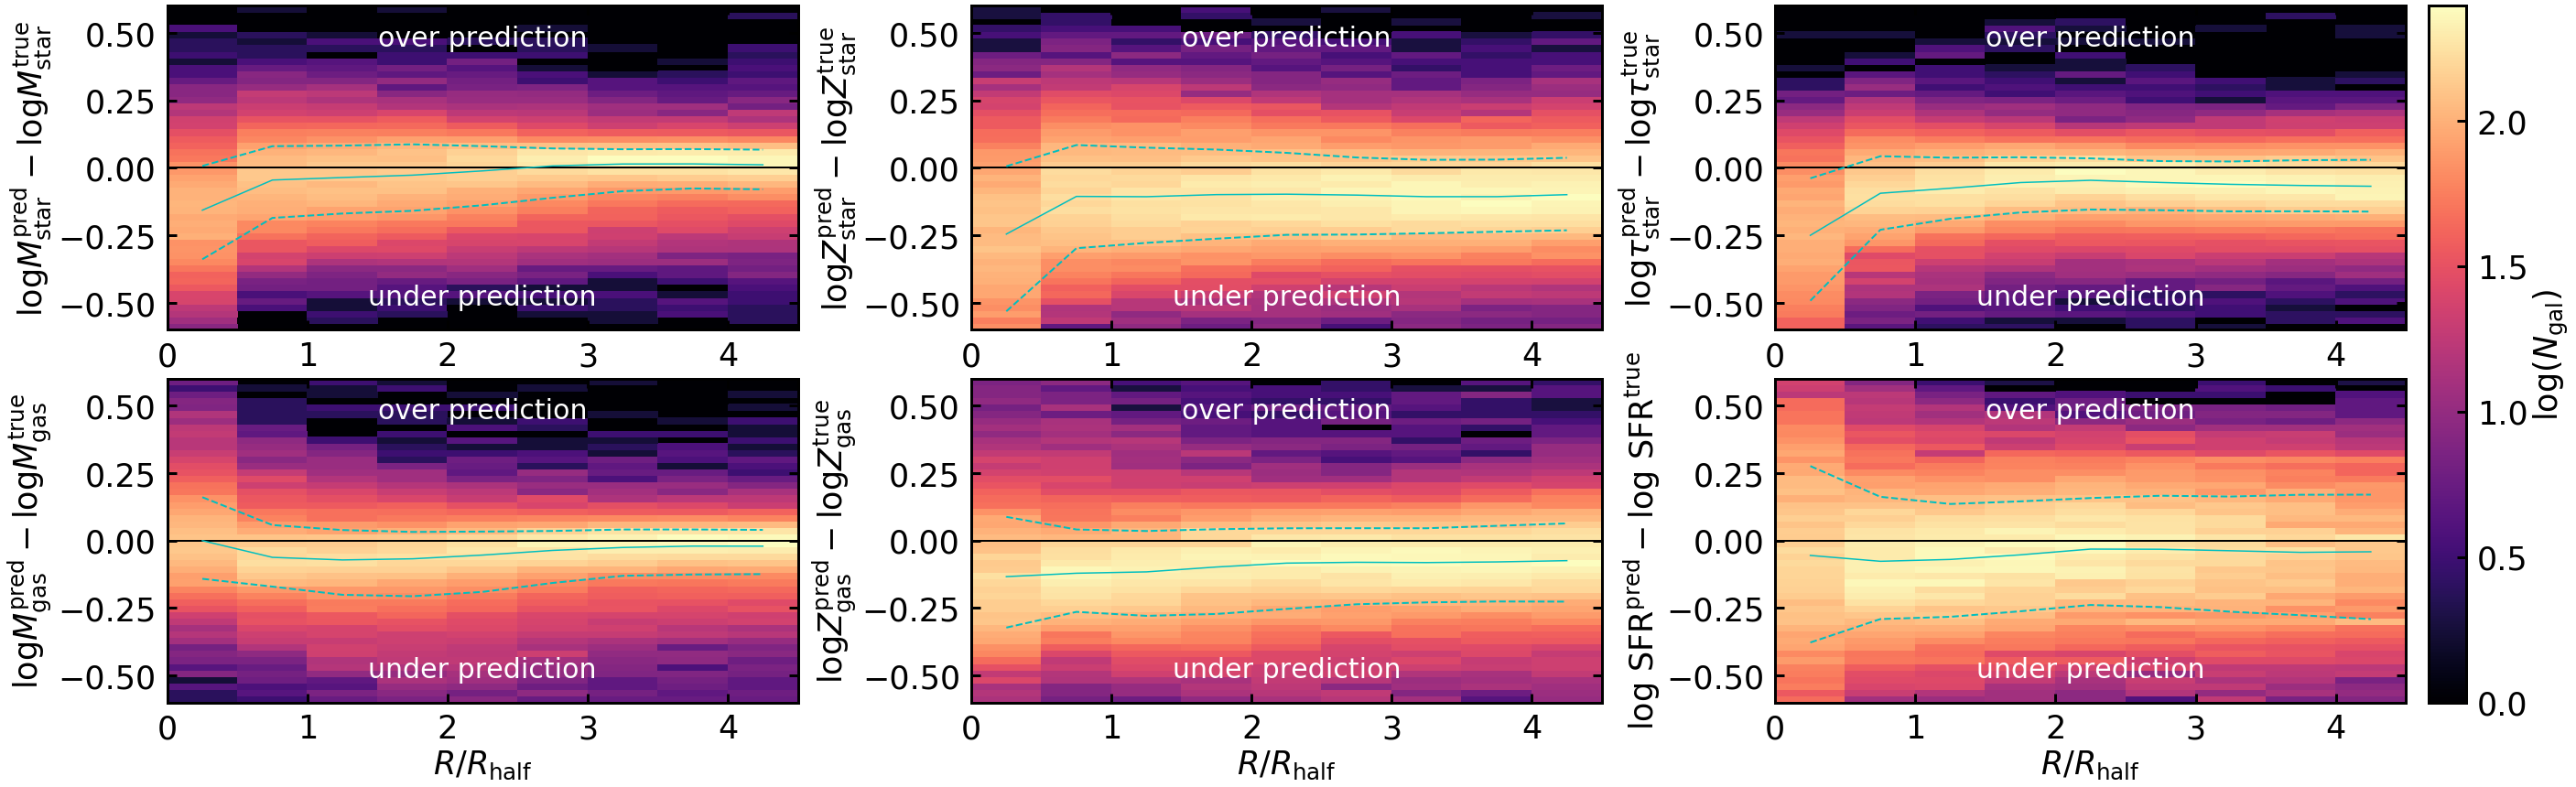

In [12]:
# radial dependence plot
fig = plt.figure(figsize=(45,14))
outer_grid = fig.add_gridspec(1, 2, wspace=0.02, hspace=0.0, width_ratios=[3.,.05])

gs = outer_grid[0].subgridspec(2, 3, width_ratios=[1,1,1], height_ratios=[.6,.6], hspace=0.15, wspace=0.275)
#gs = gridspec.GridSpec(2, 4, width_ratios=[1,1,1,.05], height_ratios=[.6,.6])
#gs.update(hspace=0.15, wspace=0.225)

cax = plt.subplot(outer_grid[1])#gs[0:,-1])

ax = plt.subplot(gs[0])

pred_mod ={}
pred_mod['stars_Masses_rad'] = masked['stars_Masses_masked_pred_rad']

_ = statistics.plot_accuracy_vs_radius(pred_mod['stars_Masses_rad'], true['stars_Masses_rad'], axis=ax, 
    x_edges=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], score_func='log_diff', cmap='magma',colorbar=False, 
    bins=50, h_range=(-.6,.6),figsize=(10,5),add_stats=True)
ax.set_ylabel(r'$\logM_{\rm star}^{\rm pred}-\logM_{\rm star}^{\rm true}$')

ax1 = plt.subplot(gs[1])

pred_mod ={}
pred_mod['stars_GFM_Metallicity_rad'] = masked['stars_GFM_Metallicity_masked_pred_rad']

_ = statistics.plot_accuracy_vs_radius(pred_mod['stars_GFM_Metallicity_rad'], true['stars_GFM_Metallicity_rad'], axis=ax1, 
    x_edges=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], score_func='log_diff',cmap='magma',colorbar=False,
    bins=50, h_range=(-.6,.6),figsize=(10,5),add_stats=True)
ax1.set_ylabel(r'$\log Z_{\rm star}^{\rm pred}-\log Z_{\rm star}^{\rm true}$')

ax2 = plt.subplot(gs[2])

pred_mod ={}
pred_mod['stars_GFM_StellarFormationTime_rad'] = masked['stars_GFM_StellarFormationTime_masked_pred_rad']

_ = statistics.plot_accuracy_vs_radius(pred_mod['stars_GFM_StellarFormationTime_rad'], true['stars_GFM_StellarFormationTime_rad'], axis=ax2, 
    x_edges=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], score_func='log_diff', cmap='magma',colorbar=False, 
    bins=50, h_range=(-.6,.6),figsize=(12.5,6.25),add_stats=True)
ax2.set_ylabel(r'$\log\tau_{\rm star}^{\rm pred}-\log\tau_{\rm star}^{\rm true}$')

ax3 = plt.subplot(gs[3])

pred_mod ={}
pred_mod['gas_Masses_rad'] = masked['gas_Masses_masked_pred_rad']

_ = statistics.plot_accuracy_vs_radius(pred_mod['gas_Masses_rad'], true['gas_Masses_rad'], axis=ax3, 
    x_edges=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], score_func='log_diff', cmap='magma',colorbar=False, 
    bins=50, h_range=(-.6,.6),figsize=(10,5),add_stats=True)
ax3.set_ylabel(r'$\logM_{\rm gas}^{\rm pred}-\logM_{\rm gas}^{\rm true}$')
#ax.set_xlabel(r'$R/R_{\rm half}$')

ax4 = plt.subplot(gs[4])

pred_mod ={}
pred_mod['gas_GFM_Metallicity_rad'] = masked['gas_GFM_Metallicity_masked_pred_rad']

_ = statistics.plot_accuracy_vs_radius(pred_mod['gas_GFM_Metallicity_rad'], true['gas_GFM_Metallicity_rad'], axis=ax4, 
    x_edges=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], score_func='log_diff',cmap='magma',colorbar=False,
    bins=50, h_range=(-.6,.6),figsize=(10,5),add_stats=True)
ax4.set_ylabel(r'$\log Z_{\rm gas}^{\rm pred}-\log Z_{\rm gas}^{\rm true}$')

ax5 = plt.subplot(gs[5])

pred_mod ={}
pred_mod['gas_StarFormationRate_rad'] = masked['gas_StarFormationRate_masked_pred_rad']

_, c = statistics.plot_accuracy_vs_radius(pred_mod['gas_StarFormationRate_rad'], true['gas_StarFormationRate_rad'], axis=ax5, 
    x_edges=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], score_func='log_diff', cmap='magma',colorbar=False, 
    bins=50, h_range=(-.6,.6),figsize=(12.5,6.25),add_stats=True)
ax5.set_ylabel(r'$\log$ SFR$^{\rm pred}-\log$ SFR$^{\rm true}$')

ax3.set_xlabel(r'$R/R_{\rm half}$')
ax4.set_xlabel(r'$R/R_{\rm half}$')
ax5.set_xlabel(r'$R/R_{\rm half}$')

for axis in [ax,ax1,ax2,ax3,ax4,ax5]:
    axis.text(0.5,0.9,'over prediction',fontsize=30,color='w',horizontalalignment='center',verticalalignment='center',transform=axis.transAxes)
    axis.text(0.5,0.1,'under prediction',fontsize=30,color='w',horizontalalignment='center',verticalalignment='center',transform=axis.transAxes)


cb = plt.colorbar(c, cax=cax, label=r'$\log(N_{\rm gal})$')

plt.savefig('./plots/radial_dependence_masked_16.pdf', bbox_inches='tight')